In [1]:
# Import Libraries
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('early_2012_2013_loan_sample_with_outcome 1.csv')

In [3]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_credit_rv', 'loan

In [4]:
default_rate_overall = df['loan_is_bad'].mean() * 100
print(default_rate_overall)

15.628


In [5]:
df1 = df.sample(n=10000, random_state=42).reset_index(drop=True)

In [6]:
default_rate_sample = df1['loan_is_bad'].mean() * 100
print(default_rate_sample)

15.379999999999999


In [7]:
df1.to_csv('/Users/manishathakur/Desktop/Warwick/4. Dissertation/2. Data and Code/Sampled_10000_data.csv')

# Data Cleaning

In [8]:
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_credit_rv,loan_is_bad
0,1406031,1655188,31825,31825,31800.0,60.0,15.31,762.31,C,C2,...,Dec-2015,0,NaN,1,INDIVIDUAL,0,0.0,150623.0,73700.0,True
1,2664688,3206839,8000,8000,8000.0,36.0,11.14,262.45,B,B2,...,Oct-2015,0,18.0,1,INDIVIDUAL,0,0.0,144075.0,25700.0,False
2,974654,1196932,6400,6400,6375.0,36.0,15.80,224.38,C,C3,...,Dec-2015,0,NaN,1,INDIVIDUAL,0,0.0,17990.0,5100.0,False
3,2367320,2829710,19500,19500,19500.0,36.0,12.12,648.80,B,B3,...,Dec-2015,0,12.0,1,INDIVIDUAL,0,0.0,18439.0,7500.0,False
4,1432440,1683709,7800,7800,7800.0,36.0,13.11,263.23,B,B4,...,Nov-2013,0,NaN,1,INDIVIDUAL,0,NaN,NaN,NaN,False


In [9]:
df1.shape

(10000, 57)

In [10]:
df1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_credit_rv', 'loan

In [12]:
df1.isna().sum()[lambda x: x > 0]

emp_title                       584
emp_length                      357
desc                           3789
title                             2
mths_since_last_delinq         5673
mths_since_last_record         9476
revol_util                        6
last_pymnt_d                      6
next_pymnt_d                   8579
mths_since_last_major_derog    8612
tot_coll_amt                   2851
tot_cur_bal                    2851
total_credit_rv                2851
dtype: int64

In [13]:
pd.crosstab(df1["purpose"], df1["loan_is_bad"], margins = True)

loan_is_bad,False,True,All
purpose,,,
car,109,12,121
credit_card,1817,266,2083
debt_consolidation,4984,969,5953
home_improvement,454,63,517
house,52,10,62
major_purchase,175,20,195
medical,84,15,99
moving,64,11,75
other,424,106,530


In [14]:
loan_home_emplength = pd.crosstab(df1["loan_is_bad"],df1["home_ownership"],
        values=df1["emp_length"], aggfunc="max")
loan_home_emplength = loan_home_emplength.applymap(lambda x: "10 or more" if x == 10 else x)
print(loan_home_emplength)

home_ownership    MORTGAGE        NONE       OTHER         OWN        RENT
loan_is_bad                                                               
False           10 or more  10 or more  10 or more  10 or more  10 or more
True            10 or more         3.0         6.0  10 or more  10 or more


In [15]:
print(df1.columns[df1.isnull().any()]) # emp_length, revol_util has null

Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'mths_since_last_major_derog', 'tot_coll_amt', 'tot_cur_bal',
       'total_credit_rv'],
      dtype='object')


In [16]:
print(df1["emp_length"].isnull().sum()) #357 null

357


In [17]:
import matplotlib.pyplot as plt

In [18]:
df2 = df1.copy()

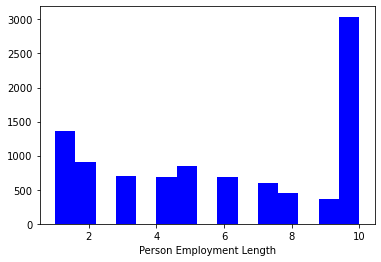

In [19]:
n, bins, patches = plt.hist(df2["emp_length"], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

In [20]:
df2["emp_length"].value_counts().sort_index()

1.0     1366
2.0      913
3.0      696
4.0      692
5.0      847
6.0      682
7.0      596
8.0      445
9.0      367
10.0    3039
Name: emp_length, dtype: int64

In [21]:
df2[df2['emp_length'].isna()]['loan_is_bad'].value_counts() # 78 True, 279 False

False    279
True      78
Name: loan_is_bad, dtype: int64

In [22]:
df2['loan_is_bad'].value_counts()

False    8462
True     1538
Name: loan_is_bad, dtype: int64

In [23]:
df3 = df2.copy()

In [24]:
df3['emp_length'] = df3['emp_length'].fillna(df3['emp_length'].median()) #since null values are high and proportion of bad loans are higher too, replace it with median

In [25]:
df3[df3['emp_length'].isna()]['loan_is_bad'].value_counts()

Series([], Name: loan_is_bad, dtype: int64)

In [26]:
df3[df3['revol_util'].isna()][['loan_is_bad','id']].value_counts()

loan_is_bad  id     
False        1368716    1
             1398319    1
             1418918    1
             2092330    1
             2185574    1
True         1351051    1
dtype: int64

In [27]:
df3["revol_util"].value_counts().sort_index()

0%       31
0.1%      4
0.2%      3
0.3%      2
0.4%      4
         ..
99%       1
99.1%     3
99.2%     1
99.4%     1
99.5%     2
Name: revol_util, Length: 988, dtype: int64

In [28]:
# Convert revol_util to numeric
df3['revol_util'] = df3['revol_util'].str.replace('%', '').astype(float)


In [29]:
df3['revol_util'] = df3['revol_util'].fillna(df3['revol_util'].median())

In [30]:
df3[df3['revol_util'].isna()][['loan_is_bad','id']].value_counts()

Series([], dtype: int64)

In [31]:
df3.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_credit_rv,loan_is_bad
0,1406031,1655188,31825,31825,31800.0,60.0,15.31,762.31,C,C2,...,Dec-2015,0,NaN,1,INDIVIDUAL,0,0.0,150623.0,73700.0,True
1,2664688,3206839,8000,8000,8000.0,36.0,11.14,262.45,B,B2,...,Oct-2015,0,18.0,1,INDIVIDUAL,0,0.0,144075.0,25700.0,False
2,974654,1196932,6400,6400,6375.0,36.0,15.80,224.38,C,C3,...,Dec-2015,0,NaN,1,INDIVIDUAL,0,0.0,17990.0,5100.0,False
3,2367320,2829710,19500,19500,19500.0,36.0,12.12,648.80,B,B3,...,Dec-2015,0,12.0,1,INDIVIDUAL,0,0.0,18439.0,7500.0,False
4,1432440,1683709,7800,7800,7800.0,36.0,13.11,263.23,B,B4,...,Nov-2013,0,NaN,1,INDIVIDUAL,0,NaN,NaN,NaN,False


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd210a23910>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd210a23f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd210a234c0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd210c826d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd210c82a60>,
 'means': []}

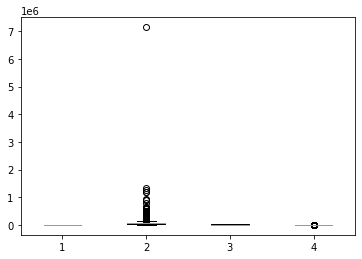

In [32]:
plt.boxplot(df3[['int_rate','annual_inc','loan_amnt','installment']])

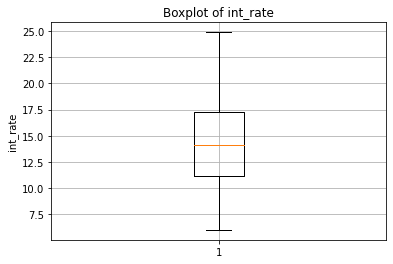

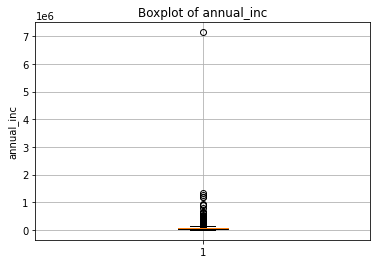

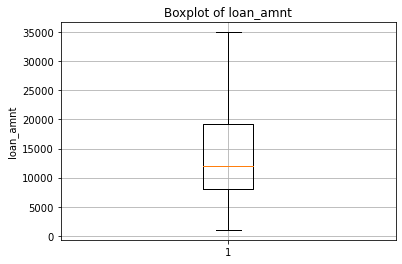

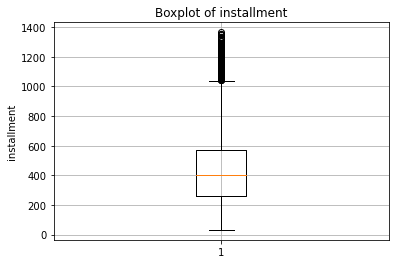

In [33]:
cols = ['int_rate', 'annual_inc', 'loan_amnt', 'installment']

for col in cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df3[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

# Feature Engineering

In [34]:
df3['debt_to_income_ratio'] = df3['annual_inc'] / (df3['loan_amnt'] + 1)
df3['installment_to_income'] = df3['installment'] / (df3['annual_inc'] + 1)

In [35]:
print(df3[['debt_to_income_ratio','installment_to_income']].head())

   debt_to_income_ratio  installment_to_income
0              2.513668               0.009529
1              4.499438               0.007290
2              5.311670               0.006599
3              2.835752               0.011732
4              5.731188               0.005887


In [36]:
df3['loan_is_bad_binary'] = np.where(df3['loan_is_bad'] == True, 1, 0)

In [37]:
df3['loan_is_bad_binary'].value_counts()

0    8462
1    1538
Name: loan_is_bad_binary, dtype: int64

In [38]:
df3['credit_utilisation_ratio'] =  (df3['revol_bal'] / df3['total_credit_rv']) * 100

In [39]:
df3['credit_utilisation_ratio'] = df3['credit_utilisation_ratio'].fillna(df3['credit_utilisation_ratio'].median())

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# Separate features and target
X = df3.drop(columns=['loan_is_bad','loan_is_bad_binary', 'id', 'loan_status', 'desc', 'title', 'total_pymnt','total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee','total_rec_prncp', 'last_pymnt_d','last_pymnt_amnt', 'next_pymnt_d'])
y = df3['loan_is_bad_binary']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(7000, 47) (7000,) (3000, 47) (3000,)


In [42]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [43]:
# Define numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [44]:
# 1. Rebuild transformers (verified correct from your debug output)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())  # No feature reduction!
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Note sparse_output=False
])

In [45]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Get feature names after one-hot encoding
cat_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_features = cat_encoder.get_feature_names_out(categorical_features)
all_features = np.concatenate([numeric_features, cat_features])

# Convert to DataFrame for better visualization
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=all_features)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=all_features)

print("\nPreprocessed training data shape:", X_train_preprocessed.shape)
print("\nPreprocessed test data shape:", X_test_preprocessed.shape)


Preprocessed training data shape: (7000, 7291)

Preprocessed test data shape: (3000, 7291)


In [46]:
# 2. Create preprocessor with dense output
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)],
    remainder='drop',
    sparse_threshold=0
)

In [47]:
# Explicitly set sparse_threshold=0 in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)],
    remainder='drop',
    sparse_threshold=0  # Force dense output
)

In [48]:
print(X_train.shape, X_test.shape, numeric_features.shape, categorical_features.shape)

(7000, 47) (3000, 47) (33,) (14,)


In [49]:
print(X_train_preprocessed.shape, X_test_preprocessed.shape, y_train.shape)

(7000, 7291) (3000, 7291) (7000,)


# Feature Selection

In [50]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [51]:
from tqdm import tqdm
import time

Logistic Regression

In [52]:
# Logistic regression with RFECV
LRestimator = LogisticRegression(max_iter=1000, random_state=42)

In [54]:
# Define RFECV with Logistic Regression
LRrfecv = RFECV(
    estimator=LRestimator,          # Your LogisticRegression(max_iter=1000, solver="liblinear" or "lbfgs")
    step=0.1,                       # Drop 10% features per step
    cv=StratifiedKFold(3),          # 3-fold CV for speed
    scoring='f1',
    min_features_to_select=10,
    n_jobs=-1,
    verbose=0
)

print("Starting RFECV for Logistic Regression...")

start_time = time.time()
with tqdm(total=X_train_preprocessed.shape[1], desc="RFECV Iterations (LR)") as pbar:
    LRrfecv.fit(X_train_preprocessed, y_train)

    # Progress simulation
    n_features_remaining = X_train_preprocessed.shape[1]
    while n_features_remaining > LRrfecv.min_features_to_select:
        step_size = max(1, int(n_features_remaining * 0.1))
        n_features_remaining -= step_size
        pbar.update(step_size)
        print(f"Features remaining: {n_features_remaining}")

end_time = time.time()
print(f"\nRFECV (Logistic Regression) completed in {end_time - start_time:.2f} seconds")
print(f"Optimal number of features: {LRrfecv.n_features_}")

Starting RFECV for Logistic Regression...


RFECV Iterations (LR): 100%|██████████████▉| 7281/7291 [00:40<00:00, 181.51it/s]

Features remaining: 6562
Features remaining: 5906
Features remaining: 5316
Features remaining: 4785
Features remaining: 4307
Features remaining: 3877
Features remaining: 3490
Features remaining: 3141
Features remaining: 2827
Features remaining: 2545
Features remaining: 2291
Features remaining: 2062
Features remaining: 1856
Features remaining: 1671
Features remaining: 1504
Features remaining: 1354
Features remaining: 1219
Features remaining: 1098
Features remaining: 989
Features remaining: 891
Features remaining: 802
Features remaining: 722
Features remaining: 650
Features remaining: 585
Features remaining: 527
Features remaining: 475
Features remaining: 428
Features remaining: 386
Features remaining: 348
Features remaining: 314
Features remaining: 283
Features remaining: 255
Features remaining: 230
Features remaining: 207
Features remaining: 187
Features remaining: 169
Features remaining: 153
Features remaining: 138
Features remaining: 125
Features remaining: 113
Features remaining: 10

In [55]:
print("Optimal number of features:", LRrfecv.n_features_)
print("Selected features:", X_train_preprocessed_df.columns[LRrfecv.support_])

Optimal number of features: 10
Selected features: Index(['recoveries', 'collection_recovery_fee', 'zip_code_232xx',
       'zip_code_354xx', 'earliest_cr_line_Apr-1981',
       'earliest_cr_line_Feb-1993', 'earliest_cr_line_Nov-2005',
       'last_credit_pull_d_Dec-2015', 'last_credit_pull_d_Nov-2015',
       'last_credit_pull_d_Oct-2015'],
      dtype='object')


In [56]:
LRselected_features_mask = LRrfecv.support_
LR_X_train_selected = X_train_preprocessed[:, LRselected_features_mask]
LR_X_test_selected = X_test_preprocessed[:, LRselected_features_mask]

In [57]:
selected_features = X_train_preprocessed_df.columns[LRrfecv.support_]
feature_ranking = LRrfecv.ranking_[LRrfecv.support_]

# Create a table with feature names and their ranking
features_table = pd.DataFrame({
    'Feature_Name': selected_features,
    'RFECV_Ranking': feature_ranking
})

# Sort by ranking (lower rank = better)
features_table = features_table.sort_values('RFECV_Ranking').reset_index(drop=True)

# Display top 10 features
print("Top 10 Features Selected by RFECV:")
print(features_table.head(10).to_string(index=False))

Top 10 Features Selected by RFECV:
               Feature_Name  RFECV_Ranking
                 recoveries              1
    collection_recovery_fee              1
             zip_code_232xx              1
             zip_code_354xx              1
  earliest_cr_line_Apr-1981              1
  earliest_cr_line_Feb-1993              1
  earliest_cr_line_Nov-2005              1
last_credit_pull_d_Dec-2015              1
last_credit_pull_d_Nov-2015              1
last_credit_pull_d_Oct-2015              1


Decision Tree

In [58]:
# Decision Tree with RFECV
DTestimator = DecisionTreeClassifier(random_state=42)

In [60]:
# Define RFECV with Decision Tree
DTrfecv = RFECV(
    estimator=DTestimator,          # Your DecisionTreeClassifier()
    step=0.1,                       # Drop 10% features each step
    cv=StratifiedKFold(3),          # Faster CV (3-fold instead of 5)
    scoring='f1',                   # Optimize F1
    min_features_to_select=10,
    n_jobs=-1,
    verbose=0
)

print("Starting RFECV for Decision Tree...")

start_time = time.time()
with tqdm(total=X_train_preprocessed.shape[1], desc="RFECV Iterations (DT)") as pbar:
    DTrfecv.fit(X_train_preprocessed, y_train)

    # Progress simulation
    n_features_remaining = X_train_preprocessed.shape[1]
    while n_features_remaining > DTrfecv.min_features_to_select:
        step_size = max(1, int(n_features_remaining * 0.1))
        n_features_remaining -= step_size
        pbar.update(step_size)
        print(f"Features remaining: {n_features_remaining}")

end_time = time.time()
print(f"\nRFECV (Decision Tree) completed in {end_time - start_time:.2f} seconds")
print(f"Optimal number of features: {DTrfecv.n_features_}")

Starting RFECV for Decision Tree...


RFECV Iterations (DT): 100%|██████████████▉| 7281/7291 [00:29<00:00, 248.79it/s]

Features remaining: 6562
Features remaining: 5906
Features remaining: 5316
Features remaining: 4785
Features remaining: 4307
Features remaining: 3877
Features remaining: 3490
Features remaining: 3141
Features remaining: 2827
Features remaining: 2545
Features remaining: 2291
Features remaining: 2062
Features remaining: 1856
Features remaining: 1671
Features remaining: 1504
Features remaining: 1354
Features remaining: 1219
Features remaining: 1098
Features remaining: 989
Features remaining: 891
Features remaining: 802
Features remaining: 722
Features remaining: 650
Features remaining: 585
Features remaining: 527
Features remaining: 475
Features remaining: 428
Features remaining: 386
Features remaining: 348
Features remaining: 314
Features remaining: 283
Features remaining: 255
Features remaining: 230
Features remaining: 207
Features remaining: 187
Features remaining: 169
Features remaining: 153
Features remaining: 138
Features remaining: 125
Features remaining: 113
Features remaining: 10

In [61]:
print("Optimal number of features:", DTrfecv.n_features_)
print("Selected features:", X_train_preprocessed_df.columns[DTrfecv.support_])

Optimal number of features: 3646
Selected features: Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti',
       ...
       'last_credit_pull_d_Nov-2015', 'last_credit_pull_d_Oct-2012',
       'last_credit_pull_d_Oct-2013', 'last_credit_pull_d_Oct-2014',
       'last_credit_pull_d_Oct-2015', 'last_credit_pull_d_Sep-2012',
       'last_credit_pull_d_Sep-2013', 'last_credit_pull_d_Sep-2014',
       'last_credit_pull_d_Sep-2015', 'application_type_INDIVIDUAL'],
      dtype='object', length=3646)


In [62]:
DTselected_features_mask = DTrfecv.support_
DT_X_train_selected = X_train_preprocessed[:, DTselected_features_mask]
DT_X_test_selected = X_test_preprocessed[:, DTselected_features_mask]

In [63]:
selected_features = X_train_preprocessed_df.columns[DTrfecv.support_]
feature_ranking = DTrfecv.ranking_[DTrfecv.support_]

# Create a table with feature names and their ranking
features_table = pd.DataFrame({
    'Feature_Name': selected_features,
    'RFECV_Ranking': feature_ranking
})

# Sort by ranking (lower rank = better)
features_table = features_table.sort_values('RFECV_Ranking').reset_index(drop=True)

# Display top 10 features
print("Top 10 Features Selected by RFECV:")
print(features_table.head(10).to_string(index=False))

Top 10 Features Selected by RFECV:
                             Feature_Name  RFECV_Ranking
                                member_id              1
                 emp_title_Lebanon's Cafe              1
      emp_title_Ledcor Technical Services              1
             emp_title_Luminant mining co              1
emp_title_MERIT Property Management, Inc.              1
                      emp_title_MMC Group              1
          emp_title_MTA Police Department              1
           emp_title_Macy's Herald Square              1
                    emp_title_Macy's Inc.              1
      emp_title_Mark Twain Dignity Health              1


Random Forest

In [64]:
# Random Forest with RFECV
RFestimator = RandomForestClassifier(random_state=42)

In [66]:
RFrfecv = RFECV(
    estimator=RFestimator,          # Your RandomForestClassifier()
    step=0.1,                       # Drop 10% features at a time
    cv=StratifiedKFold(3),          # 3-fold CV instead of 5
    scoring='f1',                   # Optimize for F1 score
    min_features_to_select=10,
    n_jobs=-1,
    verbose=0                       # silence sklearn logs
)

print("Starting RFECV for Random Forest...")

start_time = time.time()
with tqdm(total=X_train_preprocessed.shape[1], desc="RFECV Iterations (RF)") as pbar:
    RFrfecv.fit(X_train_preprocessed, y_train)
    
    # Simulated iteration tracker
    n_features_remaining = X_train_preprocessed.shape[1]
    while n_features_remaining > RFrfecv.min_features_to_select:
        step_size = max(1, int(n_features_remaining * 0.1))
        n_features_remaining -= step_size
        pbar.update(step_size)
        print(f"Features remaining: {n_features_remaining}")

end_time = time.time()
print(f"\nRFECV (Random Forest) completed in {end_time - start_time:.2f} seconds")
print(f"Optimal number of features: {RFrfecv.n_features_}")

Starting RFECV for Random Forest...


RFECV Iterations (RF): 100%|███████████████▉| 7281/7291 [01:20<00:00, 90.22it/s]

Features remaining: 6562
Features remaining: 5906
Features remaining: 5316
Features remaining: 4785
Features remaining: 4307
Features remaining: 3877
Features remaining: 3490
Features remaining: 3141
Features remaining: 2827
Features remaining: 2545
Features remaining: 2291
Features remaining: 2062
Features remaining: 1856
Features remaining: 1671
Features remaining: 1504
Features remaining: 1354
Features remaining: 1219
Features remaining: 1098
Features remaining: 989
Features remaining: 891
Features remaining: 802
Features remaining: 722
Features remaining: 650
Features remaining: 585
Features remaining: 527
Features remaining: 475
Features remaining: 428
Features remaining: 386
Features remaining: 348
Features remaining: 314
Features remaining: 283
Features remaining: 255
Features remaining: 230
Features remaining: 207
Features remaining: 187
Features remaining: 169
Features remaining: 153
Features remaining: 138
Features remaining: 125
Features remaining: 113
Features remaining: 10

In [67]:
print("Optimal number of features:", RFrfecv.n_features_)
print("Selected features:", X_train_preprocessed_df.columns[RFrfecv.support_])

Optimal number of features: 10
Selected features: Index(['member_id', 'int_rate', 'installment', 'annual_inc', 'dti',
       'revol_util', 'recoveries', 'collection_recovery_fee',
       'debt_to_income_ratio', 'installment_to_income'],
      dtype='object')


In [68]:
RFselected_features_mask = RFrfecv.support_
RF_X_train_selected = X_train_preprocessed[:, RFselected_features_mask]
RF_X_test_selected = X_test_preprocessed[:, RFselected_features_mask]

In [69]:
selected_features = X_train_preprocessed_df.columns[RFrfecv.support_]
feature_ranking = RFrfecv.ranking_[RFrfecv.support_]

# Create a table with feature names and their ranking
features_table = pd.DataFrame({
    'Feature_Name': selected_features,
    'RFECV_Ranking': feature_ranking
})

# Sort by ranking (lower rank = better)
features_table = features_table.sort_values('RFECV_Ranking').reset_index(drop=True)

# Display top 10 features
print("Top 10 Features Selected by RFECV:")
print(features_table.head(10).to_string(index=False))

Top 10 Features Selected by RFECV:
           Feature_Name  RFECV_Ranking
              member_id              1
               int_rate              1
            installment              1
             annual_inc              1
                    dti              1
             revol_util              1
             recoveries              1
collection_recovery_fee              1
   debt_to_income_ratio              1
  installment_to_income              1


SVM

In [70]:
# SVM with RFECV
SVCestimator = SVC(kernel='linear',random_state=42)

In [72]:
SVCrfecv = RFECV(
    estimator=SVCestimator,        # ideally use SVC(kernel='linear')
    step=0.1,                      # drop 10% features per step
    cv=StratifiedKFold(3),         # 3-fold CV instead of 5
    scoring='f1',
    min_features_to_select=10,
    n_jobs=-1,
    verbose=0                      # silence sklearn logs
)

print("Starting RFECV for SVC...")

start_time = time.time()
with tqdm(total=X_train_preprocessed.shape[1], desc="RFECV Iterations (SVC)") as pbar:
    SVCrfecv.fit(X_train_preprocessed, y_train)
    
    # Simulated iteration tracker
    n_features_remaining = X_train_preprocessed.shape[1]
    while n_features_remaining > SVCrfecv.min_features_to_select:
        step_size = max(1, int(n_features_remaining * 0.1))
        n_features_remaining -= step_size
        pbar.update(step_size)
        print(f"Features remaining: {n_features_remaining}")

end_time = time.time()
print(f"\nRFECV (SVC) completed in {end_time - start_time:.2f} seconds")
print(f"Optimal number of features: {SVCrfecv.n_features_}")

Starting RFECV for SVC...


RFECV Iterations (SVC): 100%|██████████████▉| 7281/7291 [07:23<00:00, 16.43it/s]

Features remaining: 6562
Features remaining: 5906
Features remaining: 5316
Features remaining: 4785
Features remaining: 4307
Features remaining: 3877
Features remaining: 3490
Features remaining: 3141
Features remaining: 2827
Features remaining: 2545
Features remaining: 2291
Features remaining: 2062
Features remaining: 1856
Features remaining: 1671
Features remaining: 1504
Features remaining: 1354
Features remaining: 1219
Features remaining: 1098
Features remaining: 989
Features remaining: 891
Features remaining: 802
Features remaining: 722
Features remaining: 650
Features remaining: 585
Features remaining: 527
Features remaining: 475
Features remaining: 428
Features remaining: 386
Features remaining: 348
Features remaining: 314
Features remaining: 283
Features remaining: 255
Features remaining: 230
Features remaining: 207
Features remaining: 187
Features remaining: 169
Features remaining: 153
Features remaining: 138
Features remaining: 125
Features remaining: 113
Features remaining: 10

In [73]:
print("Optimal number of features:", SVCrfecv.n_features_)
print("Selected features:", X_train_preprocessed_df.columns[SVCrfecv.support_])

Optimal number of features: 10
Selected features: Index(['recoveries', 'collection_recovery_fee', 'emp_title_New Horizon Farms',
       'emp_title_New York City Board of Education',
       'emp_title_NewYork-Presbyterian Hospital',
       'emp_title_Nextran Truck Center', 'emp_title_Nielsen Corporation',
       'emp_title_Parkview Lagrange Hospital', 'zip_code_354xx',
       'zip_code_616xx'],
      dtype='object')


In [74]:
SVCselected_features_mask = SVCrfecv.support_
SVC_X_train_selected = X_train_preprocessed[:, SVCselected_features_mask]
SVC_X_test_selected = X_test_preprocessed[:, SVCselected_features_mask]

In [75]:
selected_features = X_train_preprocessed_df.columns[SVCrfecv.support_]
feature_ranking = SVCrfecv.ranking_[SVCrfecv.support_]

# Create a table with feature names and their ranking
features_table = pd.DataFrame({
    'Feature_Name': selected_features,
    'RFECV_Ranking': feature_ranking
})

# Sort by ranking (lower rank = better)
features_table = features_table.sort_values('RFECV_Ranking').reset_index(drop=True)

# Display top 10 features
print("Top 10 Features Selected by RFECV:")
print(features_table.head(10).to_string(index=False))

Top 10 Features Selected by RFECV:
                              Feature_Name  RFECV_Ranking
                                recoveries              1
                   collection_recovery_fee              1
               emp_title_New Horizon Farms              1
emp_title_New York City Board of Education              1
   emp_title_NewYork-Presbyterian Hospital              1
            emp_title_Nextran Truck Center              1
             emp_title_Nielsen Corporation              1
      emp_title_Parkview Lagrange Hospital              1
                            zip_code_354xx              1
                            zip_code_616xx              1


XGBoost

In [76]:
# XGB with RFECV
XGBestimator = XGBClassifier(kernel='linear',random_state=42)

In [77]:
XGBrfecv = RFECV(
    estimator=XGBClassifier(
        n_estimators=100,
        max_depth=3,
        learning_rate=0.1,
        tree_method="hist",
        n_jobs=-1,
        random_state=42
    ),
    step=0.1,                     # remove 10% of features each iteration
    cv=StratifiedKFold(3),        # fewer folds
    scoring='f1',
    min_features_to_select=10,
    n_jobs=-1,
    verbose=1
)

print("Starting RFECV...")

# Wrap fit with tqdm progress tracking
start_time = time.time()
with tqdm(total=X_train_preprocessed.shape[1], desc="RFECV Iterations") as pbar:
    XGBrfecv.fit(X_train_preprocessed, y_train)
    # tqdm can't directly track RFECV steps, so we simulate by number of features dropped
    # For logging iteration counts:
    n_features_remaining = X_train_preprocessed.shape[1]
    while n_features_remaining > XGBrfecv.min_features_to_select:
        step_size = max(1, int(n_features_remaining * 0.1))
        n_features_remaining -= step_size
        pbar.update(step_size)
        print(f"Features remaining: {n_features_remaining}")

end_time = time.time()
print(f"\nRFECV completed in {end_time - start_time:.2f} seconds")
print(f"Optimal number of features: {XGBrfecv.n_features_}")

Starting RFECV...


RFECV Iterations:   0%|                                | 0/7291 [00:00<?, ?it/s]

Fitting estimator with 7291 features.
Fitting estimator with 6562 features.
Fitting estimator with 5833 features.
Fitting estimator with 5104 features.
Fitting estimator with 4375 features.
Fitting estimator with 3646 features.
Fitting estimator with 2917 features.
Fitting estimator with 2188 features.
Fitting estimator with 1459 features.
Fitting estimator with 730 features.


RFECV Iterations: 100%|████████████████████▉| 7281/7291 [01:30<00:00, 80.40it/s]

Features remaining: 6562
Features remaining: 5906
Features remaining: 5316
Features remaining: 4785
Features remaining: 4307
Features remaining: 3877
Features remaining: 3490
Features remaining: 3141
Features remaining: 2827
Features remaining: 2545
Features remaining: 2291
Features remaining: 2062
Features remaining: 1856
Features remaining: 1671
Features remaining: 1504
Features remaining: 1354
Features remaining: 1219
Features remaining: 1098
Features remaining: 989
Features remaining: 891
Features remaining: 802
Features remaining: 722
Features remaining: 650
Features remaining: 585
Features remaining: 527
Features remaining: 475
Features remaining: 428
Features remaining: 386
Features remaining: 348
Features remaining: 314
Features remaining: 283
Features remaining: 255
Features remaining: 230
Features remaining: 207
Features remaining: 187
Features remaining: 169
Features remaining: 153
Features remaining: 138
Features remaining: 125
Features remaining: 113
Features remaining: 10

In [78]:
print("Optimal number of features:", XGBrfecv.n_features_)
print("Selected features:", X_train_preprocessed_df.columns[XGBrfecv.support_])

Optimal number of features: 10
Selected features: Index(['term', 'int_rate', 'annual_inc', 'out_prncp', 'recoveries',
       'installment_to_income', 'sub_grade_D4', 'home_ownership_OWN',
       'purpose_debt_consolidation', 'last_credit_pull_d_Dec-2015'],
      dtype='object')


In [79]:
XGBselected_features_mask = XGBrfecv.support_
XGB_X_train_selected = X_train_preprocessed[:, XGBselected_features_mask]
XGB_X_test_selected = X_test_preprocessed[:, XGBselected_features_mask]

In [80]:
selected_features = X_train_preprocessed_df.columns[XGBrfecv.support_]
feature_ranking = XGBrfecv.ranking_[XGBrfecv.support_]

# Create a table with feature names and their ranking
features_table = pd.DataFrame({
    'Feature_Name': selected_features,
    'RFECV_Ranking': feature_ranking
})

# Sort by ranking (lower rank = better)
features_table = features_table.sort_values('RFECV_Ranking').reset_index(drop=True)

# Display top 10 features
print("Top 10 Features Selected by RFECV:")
print(features_table.head(10).to_string(index=False))

Top 10 Features Selected by RFECV:
               Feature_Name  RFECV_Ranking
                       term              1
                   int_rate              1
                 annual_inc              1
                  out_prncp              1
                 recoveries              1
      installment_to_income              1
               sub_grade_D4              1
         home_ownership_OWN              1
 purpose_debt_consolidation              1
last_credit_pull_d_Dec-2015              1


LightGBM

In [81]:
# LightGBM with RFECV
LGBMestimator = LGBMClassifier(random_state=42)

In [82]:
# Define RFECV with lighter config
LGBMrfecv = RFECV(
    estimator=LGBMestimator,
    step=0.1,                      # drop 10% features each step
    cv=StratifiedKFold(3),         # reduced to 3-fold for speed
    scoring='f1',
    min_features_to_select=10,
    n_jobs=-1,
    verbose=0                      # turn off sklearn’s own logs
)

print("Starting RFECV for LightGBM...")

start_time = time.time()
with tqdm(total=X_train_preprocessed.shape[1], desc="RFECV Iterations (LightGBM)") as pbar:
    LGBMrfecv.fit(X_train_preprocessed, y_train)
    
    # Simulated iteration tracking
    n_features_remaining = X_train_preprocessed.shape[1]
    while n_features_remaining > LGBMrfecv.min_features_to_select:
        step_size = max(1, int(n_features_remaining * 0.1))
        n_features_remaining -= step_size
        pbar.update(step_size)
        print(f"Features remaining: {n_features_remaining}")

end_time = time.time()
print(f"\nRFECV (LightGBM) completed in {end_time - start_time:.2f} seconds")
print(f"Optimal number of features: {LGBMrfecv.n_features_}")

Starting RFECV for LightGBM...


RFECV Iterations (LightGBM):   0%|                     | 0/7291 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 1077, number of negative: 5923
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5820
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 421
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.153857 -> initscore=-1.704664
[LightGBM] [Info] Start training from score -1.704664
[LightGBM] [Info] Number of positive: 1077, number of negative: 5923
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5818
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 420
[LightGBM] [Info] [bin

RFECV Iterations (LightGBM): 100%|████████▉| 7281/7291 [00:36<00:00, 199.84it/s]

Features remaining: 6562
Features remaining: 5906
Features remaining: 5316
Features remaining: 4785
Features remaining: 4307
Features remaining: 3877
Features remaining: 3490
Features remaining: 3141
Features remaining: 2827
Features remaining: 2545
Features remaining: 2291
Features remaining: 2062
Features remaining: 1856
Features remaining: 1671
Features remaining: 1504
Features remaining: 1354
Features remaining: 1219
Features remaining: 1098
Features remaining: 989
Features remaining: 891
Features remaining: 802
Features remaining: 722
Features remaining: 650
Features remaining: 585
Features remaining: 527
Features remaining: 475
Features remaining: 428
Features remaining: 386
Features remaining: 348
Features remaining: 314
Features remaining: 283
Features remaining: 255
Features remaining: 230
Features remaining: 207
Features remaining: 187
Features remaining: 169
Features remaining: 153
Features remaining: 138
Features remaining: 125
Features remaining: 113
Features remaining: 10

In [83]:
print("Optimal number of features:", LGBMrfecv.n_features_)
print("Selected features:", X_train_preprocessed_df.columns[LGBMrfecv.support_])

Optimal number of features: 730
Selected features: Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti',
       ...
       'earliest_cr_line_Sep-2002', 'earliest_cr_line_Sep-2003',
       'earliest_cr_line_Sep-2005', 'initial_list_status_f',
       'initial_list_status_w', 'last_credit_pull_d_Dec-2015',
       'last_credit_pull_d_Jun-2015', 'last_credit_pull_d_Nov-2015',
       'last_credit_pull_d_Oct-2015', 'last_credit_pull_d_Sep-2015'],
      dtype='object', length=730)


In [84]:
LGBMselected_features_mask = LGBMrfecv.support_
LGBM_X_train_selected = X_train_preprocessed[:, LGBMselected_features_mask]
LGBM_X_test_selected = X_test_preprocessed[:, LGBMselected_features_mask]

In [85]:
selected_features = X_train_preprocessed_df.columns[LGBMrfecv.support_]
feature_ranking = LGBMrfecv.ranking_[LGBMrfecv.support_]

# Create a table with feature names and their ranking
features_table = pd.DataFrame({
    'Feature_Name': selected_features,
    'RFECV_Ranking': feature_ranking
})

# Sort by ranking (lower rank = better)
features_table = features_table.sort_values('RFECV_Ranking').reset_index(drop=True)

# Display top 10 features
print("Top 10 Features Selected by RFECV:")
print(features_table.head(10).to_string(index=False))

Top 10 Features Selected by RFECV:
                                      Feature_Name  RFECV_Ranking
                                         member_id              1
                        emp_title_Barnes and Noble              1
                  emp_title_Barnes-Jewish Hopsital              1
                        emp_title_Barrell Plumbing              1
emp_title_Barrett Moving and Storage A Suddath Com              1
                    emp_title_Barry S. Slatt. Com               1
                           emp_title_Bartell Drugs              1
                        emp_title_Basham Law Group              1
                    emp_title_Bastion Technologies              1
                           emp_title_Barnes Jewish              1


# Handling Class Imbalance

In [86]:
!pip install imbalanced-learn

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_class_weight

In [88]:
from sklearn.metrics import f1_score, roc_auc_score ,recall_score, precision_score, confusion_matrix

# Original

In [89]:
# Train LR on original data
lr_o = LogisticRegression(random_state=42)
lr_o.fit(LR_X_train_selected, y_train)

# Evaluate
y_lr_o = lr_o.predict(LR_X_test_selected)
print("\nLR on Original dataset Results:")
print(classification_report(y_test, y_lr_o))
print("ROC AUC:", roc_auc_score(y_test, lr_o.predict_proba(LR_X_test_selected)[:, 1]))


LR on Original dataset Results:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2539
           1       1.00      0.54      0.70       461

    accuracy                           0.93      3000
   macro avg       0.96      0.77      0.83      3000
weighted avg       0.93      0.93      0.92      3000

ROC AUC: 0.8923637245948026


In [90]:
# Train DT on original data
dt_o = DecisionTreeClassifier(random_state=42)
dt_o.fit(DT_X_train_selected, y_train)

# Evaluate
y_dt_o = dt_o.predict(DT_X_test_selected)
print("\nDT on Original dataset Results:")
print(classification_report(y_test, y_dt_o))
print("ROC AUC:", roc_auc_score(y_test, dt_o.predict_proba(DT_X_test_selected)[:, 1]))


DT on Original dataset Results:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2539
           1       0.80      0.69      0.74       461

    accuracy                           0.93      3000
   macro avg       0.87      0.83      0.85      3000
weighted avg       0.92      0.93      0.92      3000

ROC AUC: 0.8269789547697993


In [91]:
# Train RF on original data
rf_o = RandomForestClassifier(random_state=42)
rf_o.fit(RF_X_train_selected, y_train)

# Evaluate
y_rf_o = rf_o.predict(RF_X_test_selected)
print("\nRF on Original dataset Results:")
print(classification_report(y_test, y_rf_o))
print("ROC AUC:", roc_auc_score(y_test, rf_o.predict_proba(RF_X_test_selected)[:, 1]))


RF on Original dataset Results:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2539
           1       1.00      0.65      0.79       461

    accuracy                           0.95      3000
   macro avg       0.97      0.82      0.88      3000
weighted avg       0.95      0.95      0.94      3000

ROC AUC: 0.858316552454166


In [92]:
# Train SCV on original data
svc_o = SVC(kernel='linear',random_state=42, probability=True)
svc_o.fit(SVC_X_train_selected, y_train)

# Evaluate
y_svc_o = svc_o.predict(SVC_X_test_selected)
print("\nSVC on Original dataset Results:")
print(classification_report(y_test, y_svc_o))
print("ROC AUC:", roc_auc_score(y_test, svc_o.predict_proba(SVC_X_test_selected)[:, 1]))


SVC on Original dataset Results:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2539
           1       1.00      0.58      0.73       461

    accuracy                           0.94      3000
   macro avg       0.96      0.79      0.85      3000
weighted avg       0.94      0.94      0.93      3000

ROC AUC: 0.8241976148226495


In [93]:
# Train XGB on original data
xgb_o = XGBClassifier(random_state=42)
xgb_o.fit(XGB_X_train_selected, y_train)

# Evaluate
y_xgb_o = xgb_o.predict(XGB_X_test_selected)
print("\nXGB on Original dataset Results:")
print(classification_report(y_test, y_xgb_o))
print("ROC AUC:", roc_auc_score(y_test, xgb_o.predict_proba(XGB_X_test_selected)[:, 1]))


XGB on Original dataset Results:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2539
           1       0.95      0.66      0.78       461

    accuracy                           0.94      3000
   macro avg       0.95      0.83      0.87      3000
weighted avg       0.94      0.94      0.94      3000

ROC AUC: 0.9174491810617704


In [94]:
# Train LightGBM on original data
lgbm_o = LGBMClassifier(boosting_type='gbdt', objective='binary',n_estimators=500,
    learning_rate=0.05,
    max_depth=7,
    num_leaves=64,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    scale_pos_weight=5, random_state=42)
lgbm_o.fit(LGBM_X_train_selected, y_train)

# Evaluate
y_lgbm_o = lgbm_o.predict(LGBM_X_test_selected)
print("\nLGBM on Original dataset Results:")
print(classification_report(y_test, y_lgbm_o))
print("ROC AUC:", roc_auc_score(y_test, lgbm_o.predict_proba(LGBM_X_test_selected)[:, 1]))

[LightGBM] [Info] Number of positive: 1077, number of negative: 5923
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5406
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 214
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.153857 -> initscore=-1.704664
[LightGBM] [Info] Start training from score -1.704664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [95]:
# Performance of original for all four models

f1_o_LR = f1_score(y_test, y_lr_o)
recall_o_LR = recall_score(y_test, y_lr_o)
precision_o_LR = precision_score(y_test, y_lr_o)
roc_auc_o_LR = roc_auc_score(y_test, lr_o.predict_proba(LR_X_test_selected)[:, 1])
tp_o_LR, tn_o_LR, fp_o_LR, fn_o_LR = confusion_matrix(y_test, y_lr_o).ravel()

f1_o_DT = f1_score(y_test, y_dt_o)
recall_o_DT = recall_score(y_test, y_dt_o)
precision_o_DT = precision_score(y_test, y_dt_o)
roc_auc_o_DT = roc_auc_score(y_test, dt_o.predict_proba(DT_X_test_selected)[:, 1])
tp_o_DT, tn_o_DT, fp_o_DT, fn_o_DT = confusion_matrix(y_test, y_dt_o).ravel()

f1_o_RF = f1_score(y_test, y_rf_o)
recall_o_RF = recall_score(y_test, y_rf_o)
precision_o_RF = precision_score(y_test, y_rf_o)
roc_auc_o_RF = roc_auc_score(y_test, rf_o.predict_proba(RF_X_test_selected)[:, 1])
tp_o_RF, tn_o_RF, fp_o_RF, fn_o_RF = confusion_matrix(y_test, y_rf_o).ravel()

f1_o_SVC = f1_score(y_test, y_svc_o)
recall_o_SVC = recall_score(y_test, y_svc_o)
precision_o_SVC = precision_score(y_test, y_svc_o)
roc_auc_o_SVC = roc_auc_score(y_test, svc_o.predict_proba(SVC_X_test_selected)[:, 1])
tp_o_SVC, tn_o_SVC, fp_o_SVC, fn_o_SVC = confusion_matrix(y_test, y_svc_o).ravel()

f1_o_XGB = f1_score(y_test, y_xgb_o)
recall_o_XGB = recall_score(y_test, y_xgb_o)
precision_o_XGB = precision_score(y_test, y_xgb_o)
roc_auc_o_XGB = roc_auc_score(y_test, xgb_o.predict_proba(XGB_X_test_selected)[:, 1])
tp_o_XGB, tn_o_XGB, fp_o_XGB, fn_o_XGB = confusion_matrix(y_test, y_xgb_o).ravel()

f1_o_LGBM = f1_score(y_test, y_lgbm_o)
recall_o_LGBM = recall_score(y_test, y_lgbm_o)
precision_o_LGBM = precision_score(y_test, y_lgbm_o)
roc_auc_o_LGBM = roc_auc_score(y_test, lgbm_o.predict_proba(LGBM_X_test_selected)[:, 1])
tp_o_LGBM, tn_o_LGBM, fp_o_LGBM, fn_o_LGBM = confusion_matrix(y_test, y_lgbm_o).ravel()


results = {
    'No resampling on Techniques': ['Logistic Regression', 'Decision Tree', 'Random Forest','SVC', 'XGBoost', 'LightGBM'],
    'F1-Score': [f1_o_LR, f1_o_DT, f1_o_RF, f1_o_SVC, f1_o_XGB, f1_o_LGBM],
    'Precision': [precision_o_LR, precision_o_DT, precision_o_RF, precision_o_SVC,precision_o_XGB,precision_o_LGBM],
    'recall': [recall_o_LR,recall_o_DT, recall_o_RF, recall_o_SVC, recall_o_XGB, recall_o_LGBM],
    'ROC AUC': [roc_auc_o_LR, roc_auc_o_DT, roc_auc_o_RF, roc_auc_o_SVC, roc_auc_o_XGB, roc_auc_o_LGBM],
    'Predicted TP%': [(tp_o_LR/(tp_o_LR+fn_o_LR))*100, (tp_o_DT/(tp_o_DT+fn_o_DT))*100, (tp_o_RF/(tp_o_RF+fn_o_RF))*100, (tp_o_SVC/(tp_o_SVC+fn_o_SVC))*100, (tp_o_XGB/(tp_o_XGB+fn_o_XGB))*100, (tp_o_LGBM/(tp_o_LGBM+fn_o_LGBM))*100],
    'Predicted TN%': [(tn_o_LR/(tn_o_LR+fp_o_LR))*100, (tn_o_DT/(tn_o_DT+fp_o_DT))*100, (tn_o_RF/(tn_o_RF+fp_o_RF))*100, (tn_o_SVC/(tn_o_SVC+fp_o_SVC))*100, (tn_o_XGB/(tn_o_XGB+fp_o_XGB))*100, (tn_o_LGBM/(tn_o_LGBM+fp_o_LGBM))*100],
    'Predicted FP%': [(fp_o_LR/(tn_o_LR+fp_o_LR))*100, (fp_o_DT/(tn_o_DT+fp_o_DT))*100, (fp_o_RF/(tn_o_RF+fp_o_RF))*100, (fp_o_SVC/(tn_o_SVC+fp_o_SVC))*100, (fp_o_XGB/(tn_o_XGB+fp_o_XGB))*100, (fp_o_LGBM/(tn_o_LGBM+fp_o_LGBM))*100],
    'Predicted FN%': [(fn_o_LR/(tp_o_LR+fn_o_LR))*100, (fn_o_DT/(tp_o_DT+fn_o_DT))*100, (fn_o_RF/(tp_o_RF+fn_o_RF))*100, (fn_o_SVC/(tp_o_SVC+fn_o_SVC))*100, (fn_o_XGB/(tp_o_XGB+fn_o_XGB))*100, (fn_o_LGBM/(tp_o_LGBM+fn_o_LGBM))*100]
}

results_df = pd.DataFrame(results)
print("\nComparison of Techniques:")
display(results_df)


Comparison of Techniques:


,No resampling on Techniques,F1-Score,Precision,recall,ROC AUC,Predicted TP%,Predicted TN%,Predicted FP%,Predicted FN%
0,Logistic Regression,0.699577,1.000000,0.537961,0.892364,91.101543,0.000000,100.000000,8.898457
1,Decision Tree,0.737456,0.797980,0.685466,0.826979,88.612613,35.555556,64.444444,11.387387
2,Random Forest,0.786842,1.000000,0.648590,0.858317,89.464412,0.000000,100.000000,10.535588
3,SVC,0.731774,1.000000,0.577007,0.824198,90.516934,0.000000,100.000000,9.483066
4,XGBoost,0.781050,0.953125,0.661605,0.917449,89.218805,8.771930,91.228070,10.781195
5,LightGBM,0.750605,0.849315,0.672451,0.920221,88.904796,26.699029,73.300971,11.095204


# 1. Random Undersampling

In [96]:
# Apply random undersampling on LR
rus = RandomUnderSampler(random_state=42)
X_train_rus_LR, y_train_rus_LR = rus.fit_resample(LR_X_train_selected, y_train)

# Check class distribution after undersampling
print("\nClass distribution after undersampling:")
print(pd.Series(y_train_rus_LR).value_counts())

# Train a model on undersampled data
rf_rus_LR = LogisticRegression(random_state=42)
rf_rus_LR.fit(X_train_rus_LR, y_train_rus_LR)

# Evaluate
y_pred_rus_LR = rf_rus_LR.predict(LR_X_test_selected)
print("\nUndersampling Results:")
print(classification_report(y_test, y_pred_rus_LR))
print("ROC AUC:", roc_auc_score(y_test, rf_rus_LR.predict_proba(LR_X_test_selected)[:, 1]))


Class distribution after undersampling:
0    1077
1    1077
Name: loan_is_bad_binary, dtype: int64

Undersampling Results:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2539
           1       0.95      0.57      0.71       461

    accuracy                           0.93      3000
   macro avg       0.94      0.78      0.83      3000
weighted avg       0.93      0.93      0.92      3000

ROC AUC: 0.8881227258242138


In [97]:
# Apply random undersampling on DT
rus = RandomUnderSampler(random_state=42)
X_train_rus_DT, y_train_rus_DT = rus.fit_resample(DT_X_train_selected, y_train)

# Check class distribution after undersampling
print("\nClass distribution after undersampling:")
print(pd.Series(y_train_rus_DT).value_counts())

# Train a model on undersampled data
rf_rus_DT = DecisionTreeClassifier(random_state=42)
rf_rus_DT.fit(X_train_rus_DT, y_train_rus_DT)

# Evaluate
y_pred_rus_DT = rf_rus_DT.predict(DT_X_test_selected)
print("\nUndersampling Results:")
print(classification_report(y_test, y_pred_rus_DT))
print("ROC AUC:", roc_auc_score(y_test, rf_rus_DT.predict_proba(DT_X_test_selected)[:, 1]))


Class distribution after undersampling:
0    1077
1    1077
Name: loan_is_bad_binary, dtype: int64

Undersampling Results:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      2539
           1       0.44      0.81      0.57       461

    accuracy                           0.81      3000
   macro avg       0.70      0.81      0.73      3000
weighted avg       0.88      0.81      0.83      3000

ROC AUC: 0.8135776036989985


In [98]:
# Apply random undersampling on RF
rus = RandomUnderSampler(random_state=42)
X_train_rus_RF, y_train_rus_RF = rus.fit_resample(RF_X_train_selected, y_train)

# Check class distribution after undersampling
print("\nClass distribution after undersampling:")
print(pd.Series(y_train_rus_RF).value_counts())

# Train a model on undersampled data
rf_rus_RF = RandomForestClassifier(random_state=42)
rf_rus_RF.fit(X_train_rus_RF, y_train_rus_RF)

# Evaluate
y_pred_rus_RF = rf_rus_RF.predict(RF_X_test_selected)
print("\nUndersampling Results:")
print(classification_report(y_test, y_pred_rus_RF))
print("ROC AUC:", roc_auc_score(y_test, rf_rus_RF.predict_proba(RF_X_test_selected)[:, 1]))


Class distribution after undersampling:
0    1077
1    1077
Name: loan_is_bad_binary, dtype: int64

Undersampling Results:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2539
           1       0.70      0.68      0.69       461

    accuracy                           0.91      3000
   macro avg       0.82      0.81      0.82      3000
weighted avg       0.91      0.91      0.91      3000

ROC AUC: 0.8676007856612549


In [99]:
# Apply random undersampling on SVC
rus = RandomUnderSampler(random_state=42)
X_train_rus_SVC, y_train_rus_SVC = rus.fit_resample(SVC_X_train_selected, y_train)

# Check class distribution after undersampling
print("\nClass distribution after undersampling:")
print(pd.Series(y_train_rus_SVC).value_counts())

# Train a model on undersampled data
rf_rus_SVC = SVC(kernel='linear',probability=True,random_state=42)
rf_rus_SVC.fit(X_train_rus_SVC, y_train_rus_SVC)

# Evaluate
y_pred_rus_SVC = rf_rus_SVC.predict(SVC_X_test_selected)
print("\nUndersampling Results:")
print(classification_report(y_test, y_pred_rus_SVC))
print("ROC AUC:", roc_auc_score(y_test, rf_rus_SVC.predict_proba(SVC_X_test_selected)[:, 1]))


Class distribution after undersampling:
0    1077
1    1077
Name: loan_is_bad_binary, dtype: int64

Undersampling Results:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2539
           1       1.00      0.58      0.73       461

    accuracy                           0.93      3000
   macro avg       0.96      0.79      0.85      3000
weighted avg       0.94      0.93      0.93      3000

ROC AUC: 0.8241847995564209


In [100]:
# Apply random undersampling on XGB
rus = RandomUnderSampler(random_state=42)
X_train_rus_XGB, y_train_rus_XGB = rus.fit_resample(XGB_X_train_selected, y_train)

# Check class distribution after undersampling
print("\nClass distribution after undersampling:")
print(pd.Series(y_train_rus_XGB).value_counts())

# Train a model on undersampled data
rf_rus_XGB = XGBClassifier(random_state=42)
rf_rus_XGB.fit(X_train_rus_XGB, y_train_rus_XGB)

# Evaluate
y_pred_rus_XGB = rf_rus_XGB.predict(XGB_X_test_selected)
print("\nUndersampling Results:")
print(classification_report(y_test, y_pred_rus_XGB))
print("ROC AUC:", roc_auc_score(y_test, rf_rus_XGB.predict_proba(XGB_X_test_selected)[:, 1]))


Class distribution after undersampling:
0    1077
1    1077
Name: loan_is_bad_binary, dtype: int64

Undersampling Results:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      2539
           1       0.52      0.76      0.62       461

    accuracy                           0.85      3000
   macro avg       0.74      0.82      0.76      3000
weighted avg       0.89      0.85      0.87      3000

ROC AUC: 0.9095519868361585


In [101]:
# Apply random undersampling on LGBM
rus = RandomUnderSampler(random_state=42)
X_train_rus_LGBM, y_train_rus_LGBM = rus.fit_resample(LGBM_X_train_selected, y_train)

# Check class distribution after undersampling
print("\nClass distribution after undersampling:")
print(pd.Series(y_train_rus_LGBM).value_counts())

# Train a model on undersampled data
rf_rus_LGBM = LGBMClassifier(random_state=42)
rf_rus_LGBM.fit(X_train_rus_LGBM, y_train_rus_LGBM)

# Evaluate
y_pred_rus_LGBM = rf_rus_LGBM.predict(LGBM_X_test_selected)
print("\nUndersampling Results:")
print(classification_report(y_test, y_pred_rus_LGBM))
print("ROC AUC:", roc_auc_score(y_test, rf_rus_LGBM.predict_proba(LGBM_X_test_selected)[:, 1]))


Class distribution after undersampling:
0    1077
1    1077
Name: loan_is_bad_binary, dtype: int64
[LightGBM] [Info] Number of positive: 1077, number of negative: 1077
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4758
[LightGBM] [Info] Number of data points in the train set: 2154, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Undersampling Results:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      2539
           1       0.55      0.79      0.65       461

    accuracy                           0.87      3000
   macro avg       0.75      0.84      0.78      3000
weighted avg       0.90      0.87      0.88      3000

ROC AUC: 0.9237107201410704


In [102]:
# Performance of rus for all four models

f1_rus_LR = f1_score(y_test, y_pred_rus_LR)
precision_o_LR = precision_score(y_test, y_lr_o)
recall_rus_LR = recall_score(y_test, y_pred_rus_LR)
roc_auc_rus_LR = roc_auc_score(y_test, rf_rus_LR.predict_proba(LR_X_test_selected)[:, 1])
tp_rus_LR, tn_rus_LR, fp_rus_LR, fn_rus_LR = confusion_matrix(y_test, y_pred_rus_LR).ravel()

f1_rus_DT = f1_score(y_test, y_pred_rus_DT)
precision_o_DT = precision_score(y_test, y_dt_o)
recall_rus_DT = recall_score(y_test, y_pred_rus_DT)
roc_auc_rus_DT = roc_auc_score(y_test, rf_rus_DT.predict_proba(DT_X_test_selected)[:, 1])
tp_rus_DT, tn_rus_DT, fp_rus_DT, fn_rus_DT = confusion_matrix(y_test, y_pred_rus_DT).ravel()

f1_rus_RF = f1_score(y_test, y_pred_rus_RF)
precision_o_RF = precision_score(y_test, y_rf_o)
recall_rus_RF = recall_score(y_test, y_pred_rus_RF)
roc_auc_rus_RF = roc_auc_score(y_test, rf_rus_RF.predict_proba(RF_X_test_selected)[:, 1])
tp_rus_RF, tn_rus_RF, fp_rus_RF, fn_rus_RF = confusion_matrix(y_test, y_pred_rus_RF).ravel()

f1_rus_SVC = f1_score(y_test, y_pred_rus_SVC)
precision_o_SVC = precision_score(y_test, y_svc_o)
recall_rus_SVC = recall_score(y_test, y_pred_rus_SVC)
roc_auc_rus_SVC = roc_auc_score(y_test, rf_rus_SVC.predict_proba(SVC_X_test_selected)[:, 1])
tp_rus_SVC, tn_rus_SVC, fp_rus_SVC, fn_rus_SVC = confusion_matrix(y_test, y_pred_rus_SVC).ravel()

f1_rus_XGB = f1_score(y_test, y_pred_rus_XGB)
precision_o_XGB = precision_score(y_test, y_xgb_o)
recall_rus_XGB = recall_score(y_test, y_pred_rus_XGB)
roc_auc_rus_XGB = roc_auc_score(y_test, rf_rus_XGB.predict_proba(XGB_X_test_selected)[:, 1])
tp_rus_XGB, tn_rus_XGB, fp_rus_XGB, fn_rus_XGB = confusion_matrix(y_test, y_pred_rus_XGB).ravel()

f1_rus_LGBM = f1_score(y_test, y_pred_rus_LGBM)
precision_o_LGBM = precision_score(y_test, y_lgbm_o)
recall_rus_LGBM = recall_score(y_test, y_pred_rus_LGBM)
roc_auc_rus_LGBM = roc_auc_score(y_test, rf_rus_LGBM.predict_proba(LGBM_X_test_selected)[:, 1])
tp_rus_LGBM, tn_rus_LGBM, fp_rus_LGBM, fn_rus_LGBM = confusion_matrix(y_test, y_pred_rus_LGBM).ravel()


results = {
    'rus on Technique': ['Logistic Regression', 'Decision Tree', 'Random Forest','SVC', 'XGBoost', 'LightGBM'],
    'F1-Score': [f1_rus_LR, f1_rus_DT, f1_rus_RF, f1_rus_SVC, f1_rus_XGB, f1_rus_LGBM],
    'Precision': [precision_o_LR,precision_o_DT,precision_o_RF,precision_o_SVC,precision_o_XGB,precision_o_LGBM],
    'recall' : [recall_rus_LR, recall_rus_DT, recall_rus_RF, recall_rus_SVC, recall_o_XGB, recall_rus_LGBM],
    'ROC AUC': [roc_auc_rus_LR, roc_auc_rus_DT, roc_auc_rus_RF, roc_auc_rus_SVC, roc_auc_rus_XGB, roc_auc_rus_LGBM],
    'Predicted TP%': [(tp_rus_LR/(tp_rus_LR+fn_rus_LR))*100, (tp_rus_DT/(tp_rus_DT+fn_rus_DT))*100, (tp_rus_RF/(tp_rus_RF+fn_rus_RF))*100, (tp_rus_SVC/(tp_rus_SVC+fn_rus_SVC))*100, (tp_rus_XGB/(tp_rus_XGB+fn_rus_XGB))*100, (tp_rus_LGBM/(tp_rus_LGBM+fn_rus_LGBM))*100],
    'Predicted TN%': [(tn_rus_LR/(tn_rus_LR+fp_rus_LR))*100, (tn_rus_DT/(tn_rus_DT+fp_rus_DT))*100, (tn_rus_RF/(tn_rus_RF+fp_rus_RF))*100, (tn_rus_SVC/(tn_rus_SVC+fp_rus_SVC))*100, (tn_rus_XGB/(tn_rus_XGB+fp_rus_XGB))*100, (tn_rus_LGBM/(tn_rus_LGBM+fp_rus_LGBM))*100],
    'Predicted FP%': [(fp_rus_LR/(tn_rus_LR+fp_rus_LR))*100, (fp_rus_DT/(tn_rus_DT+fp_rus_DT))*100, (fp_rus_RF/(tn_rus_RF+fp_rus_RF))*100, (fp_rus_SVC/(tn_rus_SVC+fp_rus_SVC))*100, (fp_rus_XGB/(tn_rus_XGB+fp_rus_XGB))*100, (fp_rus_LGBM/(tn_rus_LGBM+fp_rus_LGBM))*100],
    'Predicted FN%': [(fn_rus_LR/(tp_rus_LR+fn_rus_LR))*100, (fn_rus_DT/(tp_rus_DT+fn_rus_DT))*100, (fn_rus_RF/(tp_rus_RF+fn_rus_RF))*100, (fn_rus_SVC/(tp_rus_SVC+fn_rus_SVC))*100, (fn_rus_XGB/(tp_rus_XGB+fn_rus_XGB))*100, (fn_rus_LGBM/(tp_rus_LGBM+fn_rus_LGBM))*100]
}

results_df = pd.DataFrame(results)
print("\nComparison of Techniques:")
display(results_df)


Comparison of Techniques:


,rus on Technique,F1-Score,Precision,recall,ROC AUC,Predicted TP%,Predicted TN%,Predicted FP%,Predicted FN%
0,Logistic Regression,0.710027,1.000000,0.568330,0.888123,90.595836,7.009346,92.990654,9.404164
1,Decision Tree,0.572956,0.797980,0.813449,0.813578,84.637444,84.615385,15.384615,15.362556
2,Random Forest,0.690869,1.000000,0.681128,0.867601,88.451637,47.686833,52.313167,11.548363
3,SVC,0.730769,1.000000,0.577007,0.824185,90.513552,0.510204,99.489796,9.486448
4,XGBoost,0.616872,0.953125,0.661605,0.909552,86.310452,74.770642,25.229358,13.689548
5,LightGBM,0.646643,0.849315,0.793926,0.923711,85.923077,76.250000,23.750000,14.076923


# 2. SMOTE (Synthetic Minority Oversampling)

In [103]:
# Apply SMOTE on LR
smote = SMOTE(random_state=42)
X_train_smote_LR, y_train_smote_LR = smote.fit_resample(LR_X_train_selected, y_train)

# Check class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_smote_LR).value_counts())

# Train a model on SMOTE data
rf_smote_LR = LogisticRegression(random_state=42)
rf_smote_LR.fit(X_train_smote_LR, y_train_smote_LR)

# Evaluate
y_pred_smote_LR = rf_smote_LR.predict(LR_X_test_selected)
print("\nSMOTE Results:")
print(classification_report(y_test, y_pred_smote_LR))
print("ROC AUC:", roc_auc_score(y_test, rf_smote_LR.predict_proba(LR_X_test_selected)[:, 1]))


Class distribution after SMOTE:
0    5923
1    5923
Name: loan_is_bad_binary, dtype: int64

SMOTE Results:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2539
           1       0.95      0.62      0.75       461

    accuracy                           0.94      3000
   macro avg       0.94      0.81      0.86      3000
weighted avg       0.94      0.94      0.93      3000

ROC AUC: 0.8926798344951083


In [104]:
# Apply SMOTE on DT
smote = SMOTE(random_state=42)
X_train_smote_DT, y_train_smote_DT = smote.fit_resample(DT_X_train_selected, y_train)

# Check class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_smote_DT).value_counts())

# Train a model on SMOTE data
rf_smote_DT = DecisionTreeClassifier(random_state=42)
rf_smote_DT.fit(X_train_smote_DT, y_train_smote_DT)

# Evaluate
y_pred_smote_DT = rf_smote_DT.predict(DT_X_test_selected)
print("\nSMOTE Results:")
print(classification_report(y_test, y_pred_smote_DT))
print("ROC AUC:", roc_auc_score(y_test, rf_smote_DT.predict_proba(DT_X_test_selected)[:, 1]))


Class distribution after SMOTE:
0    5923
1    5923
Name: loan_is_bad_binary, dtype: int64

SMOTE Results:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2539
           1       0.77      0.67      0.72       461

    accuracy                           0.92      3000
   macro avg       0.86      0.82      0.83      3000
weighted avg       0.91      0.92      0.92      3000

ROC AUC: 0.8159390300893908


In [105]:
# Apply SMOTE on RF
smote = SMOTE(random_state=42)
X_train_smote_RF, y_train_smote_RF = smote.fit_resample(RF_X_train_selected, y_train)

# Check class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_smote_RF).value_counts())

# Train a model on SMOTE data
rf_smote_RF = RandomForestClassifier(random_state=42)
rf_smote_RF.fit(X_train_smote_RF, y_train_smote_RF)

# Evaluate
y_pred_smote_RF = rf_smote_RF.predict(RF_X_test_selected)
print("\nSMOTE Results:")
print(classification_report(y_test, y_pred_smote_RF))
print("ROC AUC:", roc_auc_score(y_test, rf_smote_RF.predict_proba(RF_X_test_selected)[:, 1]))


Class distribution after SMOTE:
0    5923
1    5923
Name: loan_is_bad_binary, dtype: int64

SMOTE Results:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2539
           1       0.92      0.65      0.76       461

    accuracy                           0.94      3000
   macro avg       0.93      0.82      0.86      3000
weighted avg       0.94      0.94      0.93      3000

ROC AUC: 0.8655943421453952


In [106]:
# Apply smote on SVC
smote = SMOTE(random_state=42)
X_train_smote_SVC, y_train_smote_SVC = smote.fit_resample(SVC_X_train_selected, y_train)

# Check class distribution after undersampling
print("\nClass distribution after undersampling:")
print(pd.Series(y_train_smote_SVC).value_counts())

# Train a model on undersampled data
rf_smote_SVC = SVC(kernel='linear',probability=True,random_state=42)
rf_smote_SVC.fit(X_train_smote_SVC, y_train_smote_SVC)

# Evaluate
y_pred_smote_SVC = rf_smote_SVC.predict(SVC_X_test_selected)
print("\SMOTE Results:")
print(classification_report(y_test, y_pred_smote_SVC))
print("ROC AUC:", roc_auc_score(y_test, rf_smote_SVC.predict_proba(SVC_X_test_selected)[:, 1]))


Class distribution after undersampling:
0    5923
1    5923
Name: loan_is_bad_binary, dtype: int64
\SMOTE Results:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2539
           1       1.00      0.58      0.74       461

    accuracy                           0.94      3000
   macro avg       0.96      0.79      0.85      3000
weighted avg       0.94      0.94      0.93      3000

ROC AUC: 0.8241967604715676


In [107]:
# Apply SMOTE on XGB
smote = SMOTE(random_state=42)
X_train_smote_XGB, y_train_smote_XGB = smote.fit_resample(XGB_X_train_selected, y_train)

# Check class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_smote_XGB).value_counts())

# Train a model on SMOTE data
rf_smote_XGB = XGBClassifier(random_state=42)
rf_smote_XGB.fit(X_train_smote_XGB, y_train_smote_XGB)

# Evaluate
y_pred_smote_XGB = rf_smote_XGB.predict(XGB_X_test_selected)
print("\nSMOTE Results:")
print(classification_report(y_test, y_pred_smote_XGB))
print("ROC AUC:", roc_auc_score(y_test, rf_smote_XGB.predict_proba(XGB_X_test_selected)[:, 1]))


Class distribution after SMOTE:
0    5923
1    5923
Name: loan_is_bad_binary, dtype: int64

SMOTE Results:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2539
           1       0.83      0.67      0.74       461

    accuracy                           0.93      3000
   macro avg       0.89      0.82      0.85      3000
weighted avg       0.92      0.93      0.92      3000

ROC AUC: 0.914802401410021


In [108]:
# Apply SMOTE on LightGBM
smote = SMOTE(random_state=42)
X_train_smote_LGBM, y_train_smote_LGBM = smote.fit_resample(LGBM_X_train_selected, y_train)

# Check class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_smote_LGBM).value_counts())

# Train a model on SMOTE data
rf_smote_LGBM = LGBMClassifier(random_state=42)
rf_smote_LGBM.fit(X_train_smote_LGBM, y_train_smote_LGBM)

# Evaluate
y_pred_smote_LGBM = rf_smote_LGBM.predict(LGBM_X_test_selected)
print("\nSMOTE Results:")
print(classification_report(y_test, y_pred_smote_LGBM))
print("ROC AUC:", roc_auc_score(y_test, rf_smote_LGBM.predict_proba(LGBM_X_test_selected)[:, 1]))


Class distribution after SMOTE:
0    5923
1    5923
Name: loan_is_bad_binary, dtype: int64
[LightGBM] [Info] Number of positive: 5923, number of negative: 5923
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22692
[LightGBM] [Info] Number of data points in the train set: 11846, number of used features: 221
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

SMOTE Results:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2539
           1       0.96      0.66      0.78       461

    accuracy                           0.94      3000
   macro avg       0.95      0.83      0.87      3000
weighted avg       0.94      0.94      0.94      3000

ROC AUC: 0.9238978230280082


In [109]:
# Performance of SMOTE for all four models

f1_SMOTE_LR = f1_score(y_test, y_pred_smote_LR)
recall_SMOTE_LR = recall_score(y_test, y_pred_smote_LR)
roc_auc_SMOTE_LR = roc_auc_score(y_test, rf_smote_LR.predict_proba(LR_X_test_selected)[:, 1])
precision_SMOTE_LR = precision_score(y_test, y_pred_smote_LR)
tp_SMOTE_LR, tn_SMOTE_LR, fp_SMOTE_LR, fn_SMOTE_LR = confusion_matrix(y_test, y_pred_smote_LR).ravel()


f1_SMOTE_DT = f1_score(y_test, y_pred_smote_DT)
recall_SMOTE_DT = recall_score(y_test, y_pred_smote_DT)
roc_auc_SMOTE_DT = roc_auc_score(y_test, rf_smote_DT.predict_proba(DT_X_test_selected)[:, 1])
precision_SMOTE_DT = precision_score(y_test, y_pred_smote_DT)
tp_SMOTE_DT, tn_SMOTE_DT, fp_SMOTE_DT, fn_SMOTE_DT = confusion_matrix(y_test, y_pred_smote_DT).ravel()

f1_SMOTE_RF = f1_score(y_test, y_pred_smote_RF)
recall_SMOTE_RF = recall_score(y_test, y_pred_smote_RF)
roc_auc_SMOTE_RF = roc_auc_score(y_test, rf_smote_RF.predict_proba(RF_X_test_selected)[:, 1])
precision_SMOTE_RF = precision_score(y_test, y_pred_smote_RF)
tp_SMOTE_RF, tn_SMOTE_RF, fp_SMOTE_RF, fn_SMOTE_RF = confusion_matrix(y_test, y_pred_smote_RF).ravel()

f1_SMOTE_SVC = f1_score(y_test, y_pred_smote_SVC)
recall_SMOTE_SVC = recall_score(y_test, y_pred_smote_SVC)
roc_auc_SMOTE_SVC = roc_auc_score(y_test, rf_smote_SVC.predict_proba(SVC_X_test_selected)[:, 1])
precision_SMOTE_SVC = precision_score(y_test, y_pred_smote_SVC)
tp_SMOTE_SVC, tn_SMOTE_SVC, fp_SMOTE_SVC, fn_SMOTE_SVC = confusion_matrix(y_test, y_pred_smote_SVC).ravel()

f1_SMOTE_XGB = f1_score(y_test, y_pred_smote_XGB)
recall_SMOTE_XGB = recall_score(y_test, y_pred_smote_XGB)
roc_auc_SMOTE_XGB = roc_auc_score(y_test, rf_smote_XGB.predict_proba(XGB_X_test_selected)[:, 1])
precision_SMOTE_XGB = precision_score(y_test, y_pred_smote_XGB)
tp_SMOTE_XGB, tn_SMOTE_XGB, fp_SMOTE_XGB, fn_SMOTE_XGB = confusion_matrix(y_test, y_pred_smote_XGB).ravel()

f1_SMOTE_LGBM = f1_score(y_test, y_pred_smote_LGBM)
recall_SMOTE_LGBM = recall_score(y_test, y_pred_smote_LGBM)
roc_auc_SMOTE_LGBM = roc_auc_score(y_test, rf_smote_LGBM.predict_proba(LGBM_X_test_selected)[:, 1])
precision_SMOTE_LGBM  = precision_score(y_test, y_pred_smote_LGBM)
tp_SMOTE_LGBM , tn_SMOTE_LGBM , fp_SMOTE_LGBM , fn_SMOTE_LGBM  = confusion_matrix(y_test, y_pred_smote_LGBM).ravel()


results = {
    'smote on Technique': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC', 'XGBoost', 'LightGBM'],
    'F1-Score': [f1_SMOTE_LR, f1_SMOTE_DT, f1_SMOTE_RF, f1_SMOTE_SVC, f1_SMOTE_XGB, f1_SMOTE_LGBM],
    'Precision':[precision_SMOTE_LR,precision_SMOTE_DT,precision_SMOTE_RF,precision_SMOTE_SVC,precision_SMOTE_XGB,precision_SMOTE_LGBM],
    'recall' : [recall_SMOTE_LR, recall_SMOTE_DT, recall_SMOTE_RF, recall_SMOTE_SVC, recall_SMOTE_XGB, recall_SMOTE_LGBM],
    'ROC AUC': [roc_auc_SMOTE_LR, roc_auc_SMOTE_DT, roc_auc_SMOTE_RF, roc_auc_SMOTE_SVC, roc_auc_SMOTE_XGB, roc_auc_SMOTE_LGBM],
    'Predicted TP%': [(tp_SMOTE_LR/(tp_SMOTE_LR+fn_SMOTE_LR))*100, (tp_SMOTE_DT/(tp_SMOTE_DT+fn_SMOTE_DT))*100, (tp_SMOTE_RF/(tp_SMOTE_RF+fn_SMOTE_RF))*100, (tp_SMOTE_SVC/(tp_SMOTE_SVC+fn_SMOTE_SVC))*100, (tp_SMOTE_XGB/(tp_SMOTE_XGB+fn_SMOTE_XGB))*100, (tp_SMOTE_LGBM/(tp_SMOTE_LGBM+fn_SMOTE_LGBM))*100],
    'Predicted TN%': [(tn_SMOTE_LR/(tn_SMOTE_LR+fp_SMOTE_LR))*100, (tn_SMOTE_DT/(tn_SMOTE_DT+fp_SMOTE_DT))*100, (tn_SMOTE_RF/(tn_SMOTE_RF+fp_SMOTE_RF))*100, (tn_SMOTE_SVC/(tn_SMOTE_SVC+fp_SMOTE_SVC))*100, (tn_SMOTE_XGB/(tn_SMOTE_XGB+fp_SMOTE_XGB))*100, (tn_SMOTE_LGBM/(tn_SMOTE_LGBM+fp_SMOTE_LGBM))*100],
    'Predicted FP%': [(fp_SMOTE_LR/(tn_SMOTE_LR+fp_SMOTE_LR))*100, (fp_SMOTE_DT/(tn_SMOTE_DT+fp_SMOTE_DT))*100, (fp_SMOTE_RF/(tn_SMOTE_RF+fp_SMOTE_RF))*100, (fp_SMOTE_SVC/(tn_SMOTE_SVC+fp_SMOTE_SVC))*100, (fp_SMOTE_XGB/(tn_SMOTE_XGB+fp_SMOTE_XGB))*100, (fp_SMOTE_LGBM/(tn_SMOTE_LGBM+fp_SMOTE_LGBM))*100],
    'Predicted FN%': [(fn_SMOTE_LR/(tp_SMOTE_LR+fn_SMOTE_LR))*100, (fn_SMOTE_DT/(tp_SMOTE_DT+fn_SMOTE_DT))*100, (fn_SMOTE_RF/(tp_SMOTE_RF+fn_SMOTE_RF))*100, (fn_SMOTE_SVC/(tp_SMOTE_SVC+fn_SMOTE_SVC))*100, (fn_SMOTE_XGB/(tp_SMOTE_XGB+fn_SMOTE_XGB))*100, (fn_SMOTE_LGBM/(tp_SMOTE_LGBM+fn_SMOTE_LGBM))*100]
}

results_df = pd.DataFrame(results)
print("\nComparison of Techniques:")
display(results_df)


Comparison of Techniques:


,smote on Technique,F1-Score,Precision,recall,ROC AUC,Predicted TP%,Predicted TN%,Predicted FP%,Predicted FN%
0,Logistic Regression,0.747368,0.949833,0.616052,0.892680,89.886040,7.812500,92.187500,10.113960
1,Decision Tree,0.715447,0.770000,0.668113,0.815939,88.820327,37.551020,62.448980,11.179673
2,Random Forest,0.761783,0.922840,0.648590,0.865594,89.370779,13.368984,86.631016,10.629221
3,SVC,0.735978,0.996296,0.583514,0.824197,90.416815,0.518135,99.481865,9.583185
4,XGBoost,0.739759,0.831978,0.665944,0.914802,88.972701,28.703704,71.296296,11.027299
5,LightGBM,0.780488,0.955975,0.659436,0.923898,89.254153,8.187135,91.812865,10.745847



# 3. Threshold Optimization

In [110]:
# First train LR on original imbalanced data
lr_th = LogisticRegression(random_state=42)
lr_th.fit(LR_X_train_selected, y_train)

# Get predicted probabilities
y_probs_LR = lr_th.predict_proba(LR_X_test_selected)[:, 1]

# Find optimal threshold
thresholds_LR = np.linspace(0, 1, 100)
f1_scores_LR = [f1_score(y_test, y_probs_LR > t) for t in thresholds_LR]
optimal_threshold_LR = thresholds_LR[np.argmax(f1_scores_LR)]

print(f"\nOptimal threshold: {optimal_threshold_LR:.2f}")

# Apply optimal threshold
y_pred_optimal_LR = (y_probs_LR > optimal_threshold_LR).astype(int)

# Evaluate
print("\nThreshold Optimization Results:")
print(classification_report(y_test, y_pred_optimal_LR))
print("ROC AUC:", roc_auc_score(y_test, y_probs_LR))


Optimal threshold: 0.13

Threshold Optimization Results:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2539
           1       0.95      0.64      0.77       461

    accuracy                           0.94      3000
   macro avg       0.94      0.82      0.87      3000
weighted avg       0.94      0.94      0.93      3000

ROC AUC: 0.8923637245948026


In [111]:
# First train DT on original imbalanced data
dt_th = DecisionTreeClassifier(random_state=42)
dt_th.fit(DT_X_train_selected, y_train)

# Get predicted probabilities
y_probs_DT = dt_th.predict_proba(DT_X_test_selected)[:, 1]

# Find optimal threshold
thresholds_DT = np.linspace(0, 1, 100)
f1_scores_DT = [f1_score(y_test, y_probs_DT > t) for t in thresholds_DT]
optimal_threshold_DT = thresholds_DT[np.argmax(f1_scores_DT)]

print(f"\nOptimal threshold: {optimal_threshold_DT:.2f}")

# Apply optimal threshold
y_pred_optimal_DT = (y_probs_DT > optimal_threshold_DT).astype(int)

# Evaluate
print("\nThreshold Optimization Results:")
print(classification_report(y_test, y_pred_optimal_DT))
print("ROC AUC:", roc_auc_score(y_test, y_probs_DT))


Optimal threshold: 0.00

Threshold Optimization Results:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2539
           1       0.80      0.69      0.74       461

    accuracy                           0.93      3000
   macro avg       0.87      0.83      0.85      3000
weighted avg       0.92      0.93      0.92      3000

ROC AUC: 0.8269789547697993


In [112]:
# First train RF on original imbalanced data
rf_th = RandomForestClassifier(random_state=42)
rf_th.fit(RF_X_train_selected, y_train)

# Get predicted probabilities
y_probs_RF = rf_th.predict_proba(RF_X_test_selected)[:, 1]

# Find optimal threshold
thresholds_RF = np.linspace(0, 1, 100)
f1_scores_RF = [f1_score(y_test, y_probs_RF > t) for t in thresholds_RF]
optimal_threshold_RF = thresholds_RF[np.argmax(f1_scores_RF)]

print(f"\nOptimal threshold: {optimal_threshold_RF:.2f}")

# Apply optimal threshold
y_pred_optimal_RF = (y_probs_RF > optimal_threshold_RF).astype(int)

# Evaluate
print("\nThreshold Optimization Results:")
print(classification_report(y_test, y_pred_optimal_RF))
print("ROC AUC:", roc_auc_score(y_test, y_probs_RF))


Optimal threshold: 0.41

Threshold Optimization Results:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2539
           1       1.00      0.65      0.79       461

    accuracy                           0.95      3000
   macro avg       0.97      0.82      0.88      3000
weighted avg       0.95      0.95      0.94      3000

ROC AUC: 0.858316552454166


In [113]:
# First train svc on original imbalanced data
svc_th = SVC(kernel='linear', probability=True,random_state=42)
svc_th.fit(SVC_X_train_selected, y_train)

# Get predicted probabilities
y_probs_SVC = svc_th.predict_proba(SVC_X_test_selected)[:, 1]

# Find optimal threshold
thresholds_SVC = np.linspace(0, 1, 100)
f1_scores_SVC = [f1_score(y_test, y_probs_SVC > t) for t in thresholds_SVC]
optimal_threshold_SVC = thresholds_SVC[np.argmax(f1_scores_SVC)]

print(f"\nOptimal threshold: {optimal_threshold_SVC:.2f}")

# Apply optimal threshold
y_pred_optimal_SVC = (y_probs_SVC > optimal_threshold_SVC).astype(int)

# Evaluate
print("\nThreshold Optimization Results:")
print(classification_report(y_test, y_pred_optimal_SVC))
print("ROC AUC:", roc_auc_score(y_test, y_probs_SVC))


Optimal threshold: 0.07

Threshold Optimization Results:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2539
           1       1.00      0.65      0.79       461

    accuracy                           0.95      3000
   macro avg       0.97      0.82      0.88      3000
weighted avg       0.95      0.95      0.94      3000

ROC AUC: 0.8241976148226495


In [114]:
# First train XGB on original imbalanced data
xgb_th = XGBClassifier(random_state=42)
xgb_th.fit(XGB_X_train_selected, y_train)

# Get predicted probabilities
y_probs_XGB = xgb_th.predict_proba(XGB_X_test_selected)[:, 1]

# Find optimal threshold
thresholds_XGB = np.linspace(0, 1, 100)
f1_scores_XGB = [f1_score(y_test, y_probs_XGB > t) for t in thresholds_XGB]
optimal_threshold_XGB = thresholds_XGB[np.argmax(f1_scores_XGB)]

print(f"\nOptimal threshold: {optimal_threshold_XGB:.2f}")

# Apply optimal threshold
y_pred_optimal_XGB = (y_probs_XGB > optimal_threshold_XGB).astype(int)

# Evaluate
print("\nThreshold Optimization Results:")
print(classification_report(y_test, y_pred_optimal_XGB))
print("ROC AUC:", roc_auc_score(y_test, y_probs_XGB))


Optimal threshold: 0.61

Threshold Optimization Results:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2539
           1       0.99      0.66      0.79       461

    accuracy                           0.95      3000
   macro avg       0.97      0.83      0.88      3000
weighted avg       0.95      0.95      0.94      3000

ROC AUC: 0.9174491810617704


In [115]:
# First train LightGBM on original imbalanced data
rf = LGBMClassifier(random_state=42)
rf.fit(LGBM_X_train_selected, y_train)

# Get predicted probabilities
y_probs_LGBM = rf.predict_proba(LGBM_X_test_selected)[:, 1]

# Find optimal threshold
thresholds_LGBM = np.linspace(0, 1, 100)
f1_scores_LGBM = [f1_score(y_test, y_probs_LGBM > t) for t in thresholds_LGBM]
optimal_threshold_LGBM = thresholds_LGBM[np.argmax(f1_scores_LGBM)]

print(f"\nOptimal threshold: {optimal_threshold_LGBM:.2f}")

# Apply optimal threshold
y_pred_optimal_LGBM = (y_probs_LGBM > optimal_threshold_LGBM).astype(int)

# Evaluate
print("\nThreshold Optimization Results:")
print(classification_report(y_test, y_pred_optimal_LGBM))
print("ROC AUC:", roc_auc_score(y_test, y_probs_LGBM))

[LightGBM] [Info] Number of positive: 1077, number of negative: 5923
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002982 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5406
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 214
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.153857 -> initscore=-1.704664
[LightGBM] [Info] Start training from score -1.704664

Optimal threshold: 0.60

Threshold Optimization Results:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2539
           1       1.00      0.65      0.79       461

    accuracy                           0.95      3000
   macro avg       0.97      0.83      0.88      3000
weighted avg       0.95      0.95      0.94      3000

ROC AUC: 0.9264420805499287


In [116]:
# Performance of Threshold Optimization for all four models

f1_Th_LR = f1_score(y_test, y_pred_optimal_LR)
recall_Th_LR = recall_score(y_test, y_pred_optimal_LR)
roc_auc_Th_LR = roc_auc_score(y_test, y_probs_LR)
precision_Th_LR = precision_score(y_test, y_pred_optimal_LR)
tp_Th_LR, tn_Th_LR, fp_Th_LR, fn_Th_LR = confusion_matrix(y_test, y_pred_optimal_LR).ravel()


f1_Th_DT = f1_score(y_test, y_pred_optimal_DT)
recall_Th_DT = recall_score(y_test, y_pred_optimal_DT)
roc_auc_Th_DT = roc_auc_score(y_test, y_probs_DT)
precision_Th_DT = precision_score(y_test, y_pred_optimal_DT)
tp_Th_DT, tn_Th_DT, fp_Th_DT, fn_Th_DT = confusion_matrix(y_test, y_pred_optimal_DT).ravel()


f1_Th_RF = f1_score(y_test, y_pred_optimal_RF)
recall_Th_RF = recall_score(y_test, y_pred_optimal_RF)
roc_auc_Th_RF = roc_auc_score(y_test, y_probs_RF)
precision_Th_RF = precision_score(y_test, y_pred_optimal_RF)
tp_Th_RF, tn_Th_RF, fp_Th_RF, fn_Th_RF = confusion_matrix(y_test, y_pred_optimal_RF).ravel()


f1_Th_SVC = f1_score(y_test, y_pred_optimal_SVC)
recall_Th_SVC = recall_score(y_test, y_pred_optimal_SVC)
roc_auc_Th_SVC = roc_auc_score(y_test, y_probs_SVC)
precision_Th_SVC = precision_score(y_test, y_pred_optimal_SVC)
tp_Th_SVC, tn_Th_SVC, fp_Th_SVC, fn_Th_SVC = confusion_matrix(y_test, y_pred_optimal_SVC).ravel()


f1_Th_XGB = f1_score(y_test, y_pred_optimal_XGB)
recall_Th_XGB = recall_score(y_test, y_pred_optimal_XGB)
roc_auc_Th_XGB = roc_auc_score(y_test, y_probs_XGB)
precision_Th_XGB = precision_score(y_test, y_pred_optimal_XGB)
tp_Th_XGB, tn_Th_XGB, fp_Th_XGB, fn_Th_XGB = confusion_matrix(y_test, y_pred_optimal_XGB).ravel()


f1_Th_LGBM = f1_score(y_test, y_pred_optimal_LGBM)
recall_Th_LGBM = recall_score(y_test, y_pred_optimal_LGBM)
roc_auc_Th_LGBM = roc_auc_score(y_test, y_probs_LGBM)
precision_Th_LGBM = precision_score(y_test, y_pred_optimal_LGBM)
tp_Th_LGBM, tn_Th_LGBM, fp_Th_LGBM, fn_Th_LGBM = confusion_matrix(y_test, y_pred_optimal_LGBM).ravel()



results = {
    'Th on Technique': ['Logistic Regression', 'Decision Tree', 'Random Forest','SVC', 'XGBoost', 'LightGBM'],
    'F1-Score': [f1_Th_LR, f1_Th_DT, f1_Th_RF, f1_Th_SVC, f1_Th_XGB, f1_Th_LGBM],
    'recall' : [recall_Th_LR, recall_Th_DT, recall_Th_RF, recall_Th_SVC, recall_Th_XGB, recall_Th_LGBM],
    'ROC AUC': [roc_auc_Th_LR, roc_auc_Th_DT, roc_auc_Th_RF, roc_auc_Th_SVC, roc_auc_Th_XGB, roc_auc_Th_LGBM],
    'Precision':[precision_Th_LR,precision_Th_DT,precision_Th_RF,precision_Th_SVC,precision_Th_XGB,precision_Th_LGBM],
    'Predicted TP%': [(tp_Th_LR/(tp_Th_LR+fn_Th_LR))*100, (tp_Th_DT/(tp_Th_DT+fn_Th_DT))*100, (tp_Th_RF/(tp_Th_RF+fn_Th_RF))*100, (tp_Th_SVC/(tp_Th_SVC+fn_Th_SVC))*100, (tp_Th_XGB/(tp_Th_XGB+fn_Th_XGB))*100, (tp_Th_LGBM/(tp_Th_LGBM+fn_Th_LGBM))*100],
    'Predicted TN%': [(tn_Th_LR/(tn_Th_LR+fp_Th_LR))*100, (tn_Th_DT/(tn_Th_DT+fp_Th_DT))*100, (tn_Th_RF/(tn_Th_RF+fp_Th_RF))*100, (tn_Th_SVC/(tn_Th_SVC+fp_Th_SVC))*100, (tn_Th_XGB/(tn_Th_XGB+fp_Th_XGB))*100, (tn_Th_LGBM/(tn_Th_LGBM+fp_Th_LGBM))*100],
    'Predicted FP%': [(fp_Th_LR/(tn_Th_LR+fp_Th_LR))*100, (fp_Th_DT/(tn_Th_DT+fp_Th_DT))*100, (fp_Th_RF/(tn_Th_RF+fp_Th_RF))*100, (fp_Th_SVC/(tn_Th_SVC+fp_Th_SVC))*100, (fp_Th_XGB/(tn_Th_XGB+fp_Th_XGB))*100, (fp_Th_LGBM/(tn_Th_LGBM+fp_Th_LGBM))*100],
    'Predicted FN%': [(fn_Th_LR/(tp_Th_LR+fn_Th_LR))*100, (fn_Th_DT/(tp_Th_DT+fn_Th_DT))*100, (fn_Th_RF/(tp_Th_RF+fn_Th_RF))*100, (fn_Th_SVC/(tp_Th_SVC+fn_Th_SVC))*100, (fn_Th_XGB/(tp_Th_XGB+fn_Th_XGB))*100, (fn_Th_LGBM/(tp_Th_LGBM+fn_Th_LGBM))*100]
}

results_df = pd.DataFrame(results)
print("\nComparison of Techniques:")
display(results_df)


Comparison of Techniques:


,Th on Technique,F1-Score,recall,ROC AUC,Precision,Predicted TP%,Predicted TN%,Predicted FP%,Predicted FN%
0,Logistic Regression,0.765240,0.639913,0.892364,0.951613,89.535296,8.287293,91.712707,10.464704
1,Decision Tree,0.737456,0.685466,0.826979,0.797980,88.612613,35.555556,64.444444,11.387387
2,Random Forest,0.786842,0.648590,0.858317,1.000000,89.464412,0.000000,100.000000,10.535588
3,SVC,0.785808,0.648590,0.824198,0.996667,89.460698,0.613497,99.386503,10.539302
4,XGBoost,0.791667,0.659436,0.917449,0.990228,89.295775,1.875000,98.125000,10.704225
5,LightGBM,0.788991,0.652928,0.926442,0.996689,89.397675,0.621118,99.378882,10.602325


# 4. Cost Sensitive Learning

In [117]:
# Compute class weights
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

print("\nClass weights:", class_weights)

# Train LR with class weights
rf_weighted_LR = LogisticRegression(class_weight=class_weights, random_state=42)
rf_weighted_LR.fit(LR_X_train_selected, y_train)

# Evaluate LR
y_pred_weighted_LR = rf_weighted_LR.predict(LR_X_test_selected)
print("\nCost-Sensitive Learning Results:")
print(classification_report(y_test, y_pred_weighted_LR))
print("ROC AUC:", roc_auc_score(y_test, rf_weighted_LR.predict_proba(LR_X_test_selected)[:, 1]))


Class weights: {0: 0.5909167651527942, 1: 3.2497678737233056}

Cost-Sensitive Learning Results:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2539
           1       0.95      0.61      0.74       461

    accuracy                           0.94      3000
   macro avg       0.94      0.80      0.85      3000
weighted avg       0.94      0.94      0.93      3000

ROC AUC: 0.8926319908345215


In [118]:
# Train DT with class weights
rf_weighted_DT = DecisionTreeClassifier(class_weight=class_weights, random_state=42)
rf_weighted_DT.fit(DT_X_train_selected, y_train)

# Evaluate
y_pred_weighted_DT = rf_weighted_DT.predict(DT_X_test_selected)
print("\nCost-Sensitive Learning Results:")
print(classification_report(y_test, y_pred_weighted_DT))
print("ROC AUC:", roc_auc_score(y_test, rf_weighted_DT.predict_proba(DT_X_test_selected)[:, 1]))


Cost-Sensitive Learning Results:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2539
           1       0.72      0.72      0.72       461

    accuracy                           0.91      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.91      0.91      0.91      3000

ROC AUC: 0.832513868253937


In [119]:
# Train RF with class weights
rf_weighted_RF = RandomForestClassifier(class_weight=class_weights, random_state=42)
rf_weighted_RF.fit(RF_X_train_selected, y_train)

# Evaluate
y_pred_weighted_RF = rf_weighted_RF.predict(RF_X_test_selected)
print("\nCost-Sensitive Learning Results:")
print(classification_report(y_test, y_pred_weighted_RF))
print("ROC AUC:", roc_auc_score(y_test, rf_weighted_RF.predict_proba(RF_X_test_selected)[:, 1]))


Cost-Sensitive Learning Results:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2539
           1       1.00      0.65      0.79       461

    accuracy                           0.95      3000
   macro avg       0.97      0.82      0.88      3000
weighted avg       0.95      0.95      0.94      3000

ROC AUC: 0.8641487801148078


In [120]:
# Train SVC with class weights
rf_weighted_SVC = SVC(kernel='linear', probability=True,class_weight=class_weights, random_state=42)
rf_weighted_SVC.fit(SVC_X_train_selected, y_train)

# Evaluate
y_pred_weighted_SVC = rf_weighted_SVC.predict(SVC_X_test_selected)
print("\nCost-Sensitive Learning Results:")
print(classification_report(y_test, y_pred_weighted_SVC))
print("ROC AUC:", roc_auc_score(y_test, rf_weighted_SVC.predict_proba(SVC_X_test_selected)[:, 1]))


Cost-Sensitive Learning Results:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2539
           1       1.00      0.58      0.73       461

    accuracy                           0.94      3000
   macro avg       0.96      0.79      0.85      3000
weighted avg       0.94      0.94      0.93      3000

ROC AUC: 0.8241941974183219


In [121]:
# Train XGB with class weights
rf_weighted_XGB = XGBClassifier(class_weight=class_weights, random_state=42)
rf_weighted_XGB.fit(XGB_X_train_selected, y_train)

# Evaluate
y_pred_weighted_XGB = rf_weighted_XGB.predict(XGB_X_test_selected)
print("\nCost-Sensitive Learning Results:")
print(classification_report(y_test, y_pred_weighted_XGB))
print("ROC AUC:", roc_auc_score(y_test, rf_weighted_XGB.predict_proba(XGB_X_test_selected)[:, 1]))

[19:53:42] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.



Cost-Sensitive Learning Results:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2539
           1       0.95      0.66      0.78       461

    accuracy                           0.94      3000
   macro avg       0.95      0.83      0.87      3000
weighted avg       0.94      0.94      0.94      3000

ROC AUC: 0.9174491810617704


In [122]:
# Train LightGBM with class weights
rf_weighted_LGBM = LGBMClassifier(class_weight=class_weights, random_state=42)
rf_weighted_LGBM.fit(LGBM_X_train_selected, y_train)

# Evaluate
y_pred_weighted_LGBM = rf_weighted_LGBM.predict(LGBM_X_test_selected)
print("\nCost-Sensitive Learning Results:")
print(classification_report(y_test, y_pred_weighted_LGBM))
print("ROC AUC:", roc_auc_score(y_test, rf_weighted_LGBM.predict_proba(LGBM_X_test_selected)[:, 1]))

[LightGBM] [Info] Number of positive: 1077, number of negative: 5923
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008400 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5406
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 214
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000

Cost-Sensitive Learning Results:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2539
           1       0.84      0.70      0.76       461

    accuracy                           0.93      3000
   macro avg       0.89      0.84      0.86      3000
weighted avg       0.93      0.93      0.93      3000

ROC AUC: 0.922697459757928


In [123]:
# Performance of Cost Sensitive Learning for all four models

f1_CS_LR = f1_score(y_test, y_pred_weighted_LR)
recall_CS_LR = recall_score(y_test, y_pred_weighted_LR)
roc_auc_CS_LR = roc_auc_score(y_test, rf_weighted_LR.predict_proba(LR_X_test_selected)[:, 1])
precision_CS_LR = precision_score(y_test, y_pred_weighted_LR)
tp_CS_LR, tn_CS_LR, fp_CS_LR, fn_CS_LR = confusion_matrix(y_test, y_pred_weighted_LR).ravel()
accuracy_CS_LR = ((tp_CS_LR + tn_CS_LR)/(tp_CS_LR + tn_CS_LR + fp_CS_LR + fn_CS_LR))*100

f1_CS_DT = f1_score(y_test, y_pred_weighted_DT)
recall_CS_DT = recall_score(y_test, y_pred_weighted_DT)
roc_auc_CS_DT = roc_auc_score(y_test, rf_weighted_DT.predict_proba(DT_X_test_selected)[:, 1])
precision_CS_DT = precision_score(y_test, y_pred_weighted_DT)
tp_CS_DT, tn_CS_DT, fp_CS_DT, fn_CS_DT = confusion_matrix(y_test, y_pred_weighted_DT).ravel()
accuracy_CS_DT = ((tp_CS_DT + tn_CS_DT)/(tp_CS_DT + tn_CS_DT + fp_CS_DT + fn_CS_DT))*100

f1_CS_RF = f1_score(y_test, y_pred_weighted_RF)
recall_CS_RF = recall_score(y_test, y_pred_weighted_RF)
roc_auc_CS_RF = roc_auc_score(y_test, rf_weighted_RF.predict_proba(RF_X_test_selected)[:, 1])
precision_CS_RF = precision_score(y_test, y_pred_weighted_RF)
tp_CS_RF, tn_CS_RF, fp_CS_RF, fn_CS_RF = confusion_matrix(y_test, y_pred_weighted_RF).ravel()
accuracy_CS_RF = ((tp_CS_RF + tn_CS_RF)/(tp_CS_RF + tn_CS_RF + fp_CS_RF + fn_CS_RF))*100

f1_CS_SVC = f1_score(y_test, y_pred_weighted_SVC)
recall_CS_SVC = recall_score(y_test, y_pred_weighted_SVC)
roc_auc_CS_SVC = roc_auc_score(y_test, rf_weighted_SVC.predict_proba(SVC_X_test_selected)[:, 1])
precision_CS_SVC = precision_score(y_test, y_pred_weighted_SVC)
tp_CS_SVC, tn_CS_SVC, fp_CS_SVC, fn_CS_SVC = confusion_matrix(y_test, y_pred_weighted_SVC).ravel()
accuracy_CS_SVC = ((tp_CS_SVC + tn_CS_SVC)/(tp_CS_SVC + tn_CS_SVC + fp_CS_SVC + fn_CS_SVC))*100

f1_CS_XGB = f1_score(y_test, y_pred_weighted_XGB)
recall_CS_XGB = recall_score(y_test, y_pred_weighted_XGB)
roc_auc_CS_XGB = roc_auc_score(y_test, rf_weighted_XGB.predict_proba(XGB_X_test_selected)[:, 1])
precision_CS_XGB = precision_score(y_test, y_pred_weighted_XGB)
tp_CS_XGB, tn_CS_XGB, fp_CS_XGB, fn_CS_XGB = confusion_matrix(y_test, y_pred_weighted_XGB).ravel()
accuracy_CS_XGB = ((tp_CS_XGB + tn_CS_XGB)/(tp_CS_XGB + tn_CS_XGB + fp_CS_XGB + fn_CS_XGB))*100

f1_CS_LGBM = f1_score(y_test, y_pred_weighted_LGBM)
recall_CS_LGBM = recall_score(y_test, y_pred_weighted_LGBM)
roc_auc_CS_LGBM = roc_auc_score(y_test, rf_weighted_LGBM.predict_proba(LGBM_X_test_selected)[:, 1])
precision_CS_LGBM  = precision_score(y_test, y_pred_weighted_LGBM)
tp_CS_LGBM , tn_CS_LGBM , fp_CS_LGBM , fn_CS_LGBM  = confusion_matrix(y_test, y_pred_weighted_LGBM).ravel()
accuracy_CS_LGBM = ((tp_CS_LGBM + tn_CS_LGBM)/(tp_CS_LGBM + tn_CS_LGBM + fp_CS_LGBM + fn_CS_LGBM))*100


results = {
    'CS on Technique': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC', 'XGBoost', 'LightGBM'],
    'F1-Score': [f1_CS_LR, f1_CS_DT, f1_CS_RF, f1_CS_SVC, f1_CS_XGB, f1_CS_LGBM],
    'Accuracy': [accuracy_CS_LR,accuracy_CS_DT,accuracy_CS_RF,accuracy_CS_SVC,accuracy_CS_XGB,accuracy_CS_LGBM],
    'Precision':[precision_CS_LR,precision_CS_DT,precision_CS_RF,precision_CS_SVC,precision_CS_XGB,precision_CS_LGBM],
    'recall' : [recall_CS_LR, recall_CS_DT, recall_CS_RF, recall_CS_SVC, recall_CS_XGB, recall_CS_LGBM],
    'ROC AUC': [roc_auc_CS_LR, roc_auc_CS_DT, roc_auc_CS_RF, roc_auc_CS_SVC, roc_auc_CS_XGB, roc_auc_CS_LGBM],
    'Predicted TP%': [(tp_CS_LR/(tp_CS_LR+fn_CS_LR))*100, (tp_CS_DT/(tp_CS_DT+fn_CS_DT))*100, (tp_CS_RF/(tp_CS_RF+fn_CS_RF))*100, (tp_CS_SVC/(tp_CS_SVC+fn_CS_SVC))*100, (tp_CS_XGB/(tp_CS_XGB+fn_CS_XGB))*100, (tp_CS_LGBM/(tp_CS_LGBM+fn_CS_LGBM))*100],
    'Predicted TN%': [(tn_CS_LR/(tn_CS_LR+fp_CS_LR))*100, (tn_CS_DT/(tn_CS_DT+fp_CS_DT))*100, (tn_CS_RF/(tn_CS_RF+fp_CS_RF))*100, (tn_CS_SVC/(tn_CS_SVC+fp_CS_SVC))*100, (tn_CS_XGB/(tn_CS_XGB+fp_CS_XGB))*100, (tn_CS_LGBM/(tn_CS_LGBM+fp_CS_LGBM))*100],
    'Predicted FP%': [(fp_CS_LR/(tn_CS_LR+fp_CS_LR))*100, (fp_CS_DT/(tn_CS_DT+fp_CS_DT))*100, (fp_CS_RF/(tn_CS_RF+fp_CS_RF))*100, (fp_CS_SVC/(tn_CS_SVC+fp_CS_SVC))*100, (fp_CS_XGB/(tn_CS_XGB+fp_CS_XGB))*100, (fp_CS_LGBM/(tn_CS_LGBM+fp_CS_LGBM))*100],
    'Predicted FN%': [(fn_CS_LR/(tp_CS_LR+fn_CS_LR))*100, (fn_CS_DT/(tp_CS_DT+fn_CS_DT))*100, (fn_CS_RF/(tp_CS_RF+fn_CS_RF))*100, (fn_CS_SVC/(tp_CS_SVC+fn_CS_SVC))*100, (fn_CS_XGB/(tp_CS_XGB+fn_CS_XGB))*100, (fn_CS_LGBM/(tp_CS_LGBM+fn_CS_LGBM))*100]
}


results_df = pd.DataFrame(results)
print("\nComparison of Techniques:")
display(results_df)


Comparison of Techniques:


,CS on Technique,F1-Score,Accuracy,Precision,recall,ROC AUC,Predicted TP%,Predicted TN%,Predicted FP%,Predicted FN%
0,Logistic Regression,0.742404,84.633333,0.949324,0.609544,0.892632,89.982175,7.692308,92.307692,10.017825
1,Decision Tree,0.717391,84.633333,0.718954,0.715835,0.832514,87.956204,49.615385,50.384615,12.043796
2,Random Forest,0.786842,84.633333,1.000000,0.648590,0.864149,89.464412,0.000000,100.000000,10.535588
3,SVC,0.734247,84.633333,0.996283,0.581345,0.824194,90.449038,0.515464,99.484536,9.550962
4,XGBoost,0.781050,84.633333,0.953125,0.661605,0.917449,89.218805,8.771930,91.228070,10.781195
5,LightGBM,0.762470,84.633333,0.842520,0.696312,0.922697,88.535714,30.000000,70.000000,11.464286


In [124]:
import pandas as pd

# Fist DataFrame (Original)
results_o = {
    'Imbalance Technique': ['Original Imbalanced Data'] * 6,
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC', 'XGBoost', 'LightGBM'],
    'F1-Score': [f1_o_LR, f1_o_DT, f1_o_RF, f1_o_SVC, f1_o_XGB, f1_o_LGBM],
    'Precision': [precision_o_LR, precision_o_DT, precision_o_RF, precision_o_SVC,precision_o_XGB,precision_o_LGBM],
    'recall': [recall_o_LR,recall_o_DT, recall_o_RF, recall_o_SVC, recall_o_XGB, recall_o_LGBM],
    'ROC AUC': [roc_auc_o_LR, roc_auc_o_DT, roc_auc_o_RF, roc_auc_o_SVC, roc_auc_o_XGB, roc_auc_o_LGBM],
    'Predicted TP%': [(tp_o_LR/(tp_o_LR+fn_o_LR))*100, (tp_o_DT/(tp_o_DT+fn_o_DT))*100, (tp_o_RF/(tp_o_RF+fn_o_RF))*100, (tp_o_SVC/(tp_o_SVC+fn_o_SVC))*100, (tp_o_XGB/(tp_o_XGB+fn_o_XGB))*100, (tp_o_LGBM/(tp_o_LGBM+fn_o_LGBM))*100],
    'Predicted TN%': [(tn_o_LR/(tn_o_LR+fp_o_LR))*100, (tn_o_DT/(tn_o_DT+fp_o_DT))*100, (tn_o_RF/(tn_o_RF+fp_o_RF))*100, (tn_o_SVC/(tn_o_SVC+fp_o_SVC))*100, (tn_o_XGB/(tn_o_XGB+fp_o_XGB))*100, (tn_o_LGBM/(tn_o_LGBM+fp_o_LGBM))*100],
    'Predicted FP%': [(fp_o_LR/(tn_o_LR+fp_o_LR))*100, (fp_o_DT/(tn_o_DT+fp_o_DT))*100, (fp_o_RF/(tn_o_RF+fp_o_RF))*100, (fp_o_SVC/(tn_o_SVC+fp_o_SVC))*100, (fp_o_XGB/(tn_o_XGB+fp_o_XGB))*100, (fp_o_LGBM/(tn_o_LGBM+fp_o_LGBM))*100],
    'Predicted FN%': [(fn_o_LR/(tp_o_LR+fn_o_LR))*100, (fn_o_DT/(tp_o_DT+fn_o_DT))*100, (fn_o_RF/(tp_o_RF+fn_o_RF))*100, (fn_o_SVC/(tp_o_SVC+fn_o_SVC))*100, (fn_o_XGB/(tp_o_XGB+fn_o_XGB))*100, (fn_o_LGBM/(tp_o_LGBM+fn_o_LGBM))*100]
}
df_o = pd.DataFrame(results_o)

# Second DataFrame (Random Undersampling)
results_rus = {
    'Imbalance Technique': ['Random Undersampling'] * 6,
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC', 'XGBoost', 'LightGBM'],
    'F1-Score': [f1_rus_LR, f1_rus_DT, f1_rus_RF, f1_rus_SVC, f1_rus_XGB, f1_rus_LGBM],
    'Precision': [precision_o_LR,precision_o_DT,precision_o_RF,precision_o_SVC,precision_o_XGB,precision_o_LGBM],
    'recall' : [recall_rus_LR, recall_rus_DT, recall_rus_RF, recall_rus_SVC, recall_o_XGB, recall_rus_LGBM],
    'ROC AUC': [roc_auc_rus_LR, roc_auc_rus_DT, roc_auc_rus_RF, roc_auc_rus_SVC, roc_auc_rus_XGB, roc_auc_rus_LGBM],
    'Predicted TP%': [(tp_rus_LR/(tp_rus_LR+fn_rus_LR))*100, (tp_rus_DT/(tp_rus_DT+fn_rus_DT))*100, (tp_rus_RF/(tp_rus_RF+fn_rus_RF))*100, (tp_rus_SVC/(tp_rus_SVC+fn_rus_SVC))*100, (tp_rus_XGB/(tp_rus_XGB+fn_rus_XGB))*100, (tp_rus_LGBM/(tp_rus_LGBM+fn_rus_LGBM))*100],
    'Predicted TN%': [(tn_rus_LR/(tn_rus_LR+fp_rus_LR))*100, (tn_rus_DT/(tn_rus_DT+fp_rus_DT))*100, (tn_rus_RF/(tn_rus_RF+fp_rus_RF))*100, (tn_rus_SVC/(tn_rus_SVC+fp_rus_SVC))*100, (tn_rus_XGB/(tn_rus_XGB+fp_rus_XGB))*100, (tn_rus_LGBM/(tn_rus_LGBM+fp_rus_LGBM))*100],
    'Predicted FP%': [(fp_rus_LR/(tn_rus_LR+fp_rus_LR))*100, (fp_rus_DT/(tn_rus_DT+fp_rus_DT))*100, (fp_rus_RF/(tn_rus_RF+fp_rus_RF))*100, (fp_rus_SVC/(tn_rus_SVC+fp_rus_SVC))*100, (fp_rus_XGB/(tn_rus_XGB+fp_rus_XGB))*100, (fp_rus_LGBM/(tn_rus_LGBM+fp_rus_LGBM))*100],
    'Predicted FN%': [(fn_rus_LR/(tp_rus_LR+fn_rus_LR))*100, (fn_rus_DT/(tp_rus_DT+fn_rus_DT))*100, (fn_rus_RF/(tp_rus_RF+fn_rus_RF))*100, (fn_rus_SVC/(tp_rus_SVC+fn_rus_SVC))*100, (fn_rus_XGB/(tp_rus_XGB+fn_rus_XGB))*100, (fn_rus_LGBM/(tp_rus_LGBM+fn_rus_LGBM))*100]
}
df_rus = pd.DataFrame(results_rus)

# Third DataFrame (SMOTE)
results_smote = {
    'Imbalance Technique': ['SMOTE'] * 6,
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC', 'XGBoost', 'LightGBM'],
    'F1-Score': [f1_SMOTE_LR, f1_SMOTE_DT, f1_SMOTE_RF, f1_SMOTE_SVC, f1_SMOTE_XGB, f1_SMOTE_LGBM],
    'Precision':[precision_SMOTE_LR,precision_SMOTE_DT,precision_SMOTE_RF,precision_SMOTE_SVC,precision_SMOTE_XGB,precision_SMOTE_LGBM],
    'recall' : [recall_SMOTE_LR, recall_SMOTE_DT, recall_SMOTE_RF, recall_SMOTE_SVC, recall_SMOTE_XGB, recall_SMOTE_LGBM],
    'ROC AUC': [roc_auc_SMOTE_LR, roc_auc_SMOTE_DT, roc_auc_SMOTE_RF, roc_auc_SMOTE_SVC, roc_auc_SMOTE_XGB, roc_auc_SMOTE_LGBM],
    'Predicted TP%': [(tp_SMOTE_LR/(tp_SMOTE_LR+fn_SMOTE_LR))*100, (tp_SMOTE_DT/(tp_SMOTE_DT+fn_SMOTE_DT))*100, (tp_SMOTE_RF/(tp_SMOTE_RF+fn_SMOTE_RF))*100, (tp_SMOTE_SVC/(tp_SMOTE_SVC+fn_SMOTE_SVC))*100, (tp_SMOTE_XGB/(tp_SMOTE_XGB+fn_SMOTE_XGB))*100, (tp_SMOTE_LGBM/(tp_SMOTE_LGBM+fn_SMOTE_LGBM))*100],
    'Predicted TN%': [(tn_SMOTE_LR/(tn_SMOTE_LR+fp_SMOTE_LR))*100, (tn_SMOTE_DT/(tn_SMOTE_DT+fp_SMOTE_DT))*100, (tn_SMOTE_RF/(tn_SMOTE_RF+fp_SMOTE_RF))*100, (tn_SMOTE_SVC/(tn_SMOTE_SVC+fp_SMOTE_SVC))*100, (tn_SMOTE_XGB/(tn_SMOTE_XGB+fp_SMOTE_XGB))*100, (tn_SMOTE_LGBM/(tn_SMOTE_LGBM+fp_SMOTE_LGBM))*100],
    'Predicted FP%': [(fp_SMOTE_LR/(tn_SMOTE_LR+fp_SMOTE_LR))*100, (fp_SMOTE_DT/(tn_SMOTE_DT+fp_SMOTE_DT))*100, (fp_SMOTE_RF/(tn_SMOTE_RF+fp_SMOTE_RF))*100, (fp_SMOTE_SVC/(tn_SMOTE_SVC+fp_SMOTE_SVC))*100, (fp_SMOTE_XGB/(tn_SMOTE_XGB+fp_SMOTE_XGB))*100, (fp_SMOTE_LGBM/(tn_SMOTE_LGBM+fp_SMOTE_LGBM))*100],
    'Predicted FN%': [(fn_SMOTE_LR/(tp_SMOTE_LR+fn_SMOTE_LR))*100, (fn_SMOTE_DT/(tp_SMOTE_DT+fn_SMOTE_DT))*100, (fn_SMOTE_RF/(tp_SMOTE_RF+fn_SMOTE_RF))*100, (fn_SMOTE_SVC/(tp_SMOTE_SVC+fn_SMOTE_SVC))*100, (fn_SMOTE_XGB/(tp_SMOTE_XGB+fn_SMOTE_XGB))*100, (fn_SMOTE_LGBM/(tp_SMOTE_LGBM+fn_SMOTE_LGBM))*100]
}
df_smote = pd.DataFrame(results_smote)

# Fourth DataFrame (Cost-Sensitive)
results_cs = {
    'Imbalance Technique': ['Cost Sensitive Analysis'] * 6,
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC', 'XGBoost', 'LightGBM'],
    'F1-Score': [f1_CS_LR, f1_CS_DT, f1_CS_RF, f1_CS_SVC, f1_CS_XGB, f1_CS_LGBM],
    'Precision':[precision_CS_LR,precision_CS_DT,precision_CS_RF,precision_CS_SVC,precision_CS_XGB,precision_CS_LGBM],
    'recall' : [recall_CS_LR, recall_CS_DT, recall_CS_RF, recall_CS_SVC, recall_CS_XGB, recall_CS_LGBM],
    'ROC AUC': [roc_auc_CS_LR, roc_auc_CS_DT, roc_auc_CS_RF, roc_auc_CS_SVC, roc_auc_CS_XGB, roc_auc_CS_LGBM],
    'Predicted TP%': [(tp_CS_LR/(tp_CS_LR+fn_CS_LR))*100, (tp_CS_DT/(tp_CS_DT+fn_CS_DT))*100, (tp_CS_RF/(tp_CS_RF+fn_CS_RF))*100, (tp_CS_SVC/(tp_CS_SVC+fn_CS_SVC))*100, (tp_CS_XGB/(tp_CS_XGB+fn_CS_XGB))*100, (tp_CS_LGBM/(tp_CS_LGBM+fn_CS_LGBM))*100],
    'Predicted TN%': [(tn_CS_LR/(tn_CS_LR+fp_CS_LR))*100, (tn_CS_DT/(tn_CS_DT+fp_CS_DT))*100, (tn_CS_RF/(tn_CS_RF+fp_CS_RF))*100, (tn_CS_SVC/(tn_CS_SVC+fp_CS_SVC))*100, (tn_CS_XGB/(tn_CS_XGB+fp_CS_XGB))*100, (tn_CS_LGBM/(tn_CS_LGBM+fp_CS_LGBM))*100],
    'Predicted FP%': [(fp_CS_LR/(tn_CS_LR+fp_CS_LR))*100, (fp_CS_DT/(tn_CS_DT+fp_CS_DT))*100, (fp_CS_RF/(tn_CS_RF+fp_CS_RF))*100, (fp_CS_SVC/(tn_CS_SVC+fp_CS_SVC))*100, (fp_CS_XGB/(tn_CS_XGB+fp_CS_XGB))*100, (fp_CS_LGBM/(tn_CS_LGBM+fp_CS_LGBM))*100],
    'Predicted FN%': [(fn_CS_LR/(tp_CS_LR+fn_CS_LR))*100, (fn_CS_DT/(tp_CS_DT+fn_CS_DT))*100, (fn_CS_RF/(tp_CS_RF+fn_CS_RF))*100, (fn_CS_SVC/(tp_CS_SVC+fn_CS_SVC))*100, (fn_CS_XGB/(tp_CS_XGB+fn_CS_XGB))*100, (fn_CS_LGBM/(tp_CS_LGBM+fn_CS_LGBM))*100]
}
df_cs = pd.DataFrame(results_cs)

# Fifth DataFrame (Threshold Optimization)
results_th = {
    'Imbalance Technique': ['Threshold Optimization'] * 6,
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC', 'XGBoost', 'LightGBM'],
    'F1-Score': [f1_Th_LR, f1_Th_DT, f1_Th_RF, f1_Th_SVC, f1_Th_XGB, f1_Th_LGBM],
    'Precision':[precision_Th_LR,precision_Th_DT,precision_Th_RF,precision_Th_SVC,precision_Th_XGB,precision_Th_LGBM],
    'recall' : [recall_Th_LR, recall_Th_DT, recall_Th_RF, recall_Th_SVC, recall_Th_XGB, recall_Th_LGBM],
    'ROC AUC': [roc_auc_Th_LR, roc_auc_Th_DT, roc_auc_Th_RF, roc_auc_Th_SVC, roc_auc_Th_XGB, roc_auc_Th_LGBM],
    'Predicted TP%': [(tp_Th_LR/(tp_Th_LR+fn_Th_LR))*100, (tp_Th_DT/(tp_Th_DT+fn_Th_DT))*100, (tp_Th_RF/(tp_Th_RF+fn_Th_RF))*100, (tp_Th_SVC/(tp_Th_SVC+fn_Th_SVC))*100, (tp_Th_XGB/(tp_Th_XGB+fn_Th_XGB))*100, (tp_Th_LGBM/(tp_Th_LGBM+fn_Th_LGBM))*100],
    'Predicted TN%': [(tn_Th_LR/(tn_Th_LR+fp_Th_LR))*100, (tn_Th_DT/(tn_Th_DT+fp_Th_DT))*100, (tn_Th_RF/(tn_Th_RF+fp_Th_RF))*100, (tn_Th_SVC/(tn_Th_SVC+fp_Th_SVC))*100, (tn_Th_XGB/(tn_Th_XGB+fp_Th_XGB))*100, (tn_Th_LGBM/(tn_Th_LGBM+fp_Th_LGBM))*100],
    'Predicted FP%': [(fp_Th_LR/(tn_Th_LR+fp_Th_LR))*100, (fp_Th_DT/(tn_Th_DT+fp_Th_DT))*100, (fp_Th_RF/(tn_Th_RF+fp_Th_RF))*100, (fp_Th_SVC/(tn_Th_SVC+fp_Th_SVC))*100, (fp_Th_XGB/(tn_Th_XGB+fp_Th_XGB))*100, (fp_Th_LGBM/(tn_Th_LGBM+fp_Th_LGBM))*100],
    'Predicted FN%': [(fn_Th_LR/(tp_Th_LR+fn_Th_LR))*100, (fn_Th_DT/(tp_Th_DT+fn_Th_DT))*100, (fn_Th_RF/(tp_Th_RF+fn_Th_RF))*100, (fn_Th_SVC/(tp_Th_SVC+fn_Th_SVC))*100, (fn_Th_XGB/(tp_Th_XGB+fn_Th_XGB))*100, (fn_Th_LGBM/(tp_Th_LGBM+fn_Th_LGBM))*100]
}
df_th = pd.DataFrame(results_th)


# Combine all
combined_df = pd.concat([df_o, df_rus, df_smote, df_th, df_cs], ignore_index=True)

# Add S.No.
combined_df.insert(0, 'S.No.', range(1, len(combined_df) + 1))

# Sorted df
sorted_df = combined_df.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)

# Display final table
print("\nCombined Comparison of Techniques:")
display(combined_df)



Combined Comparison of Techniques:


,S.No.,Imbalance Technique,Model,F1-Score,Precision,recall,ROC AUC,Predicted TP%,Predicted TN%,Predicted FP%,Predicted FN%
0,1,Original Imbalanced Data,Logistic Regression,0.699577,1.000000,0.537961,0.892364,91.101543,0.000000,100.000000,8.898457
1,2,Original Imbalanced Data,Decision Tree,0.737456,0.797980,0.685466,0.826979,88.612613,35.555556,64.444444,11.387387
2,3,Original Imbalanced Data,Random Forest,0.786842,1.000000,0.648590,0.858317,89.464412,0.000000,100.000000,10.535588
3,4,Original Imbalanced Data,SVC,0.731774,1.000000,0.577007,0.824198,90.516934,0.000000,100.000000,9.483066
4,5,Original Imbalanced Data,XGBoost,0.781050,0.953125,0.661605,0.917449,89.218805,8.771930,91.228070,10.781195
5,6,Original Imbalanced Data,LightGBM,0.750605,0.849315,0.672451,0.920221,88.904796,26.699029,73.300971,11.095204
6,7,Random Undersampling,Logistic Regression,0.710027,1.000000,0.568330,0.888123,90.595836,7.009346,92.990654,9.404164
7,8,Random Undersampling,Decision Tree,0.572956,0.797980,0.813449,0.813578,84.637444,84.615385,15.384615,15.362556
8,9,Random Undersampling,Random Forest,0.690869,1.000000,0.681128,0.867601,88.451637,47.686833,52.313167,11.548363
9,10,Random Undersampling,SVC,0.730769,1.000000,0.577007,0.824185,90.513552,0.510204,99.489796,9.486448


# ROC_AUC Curve

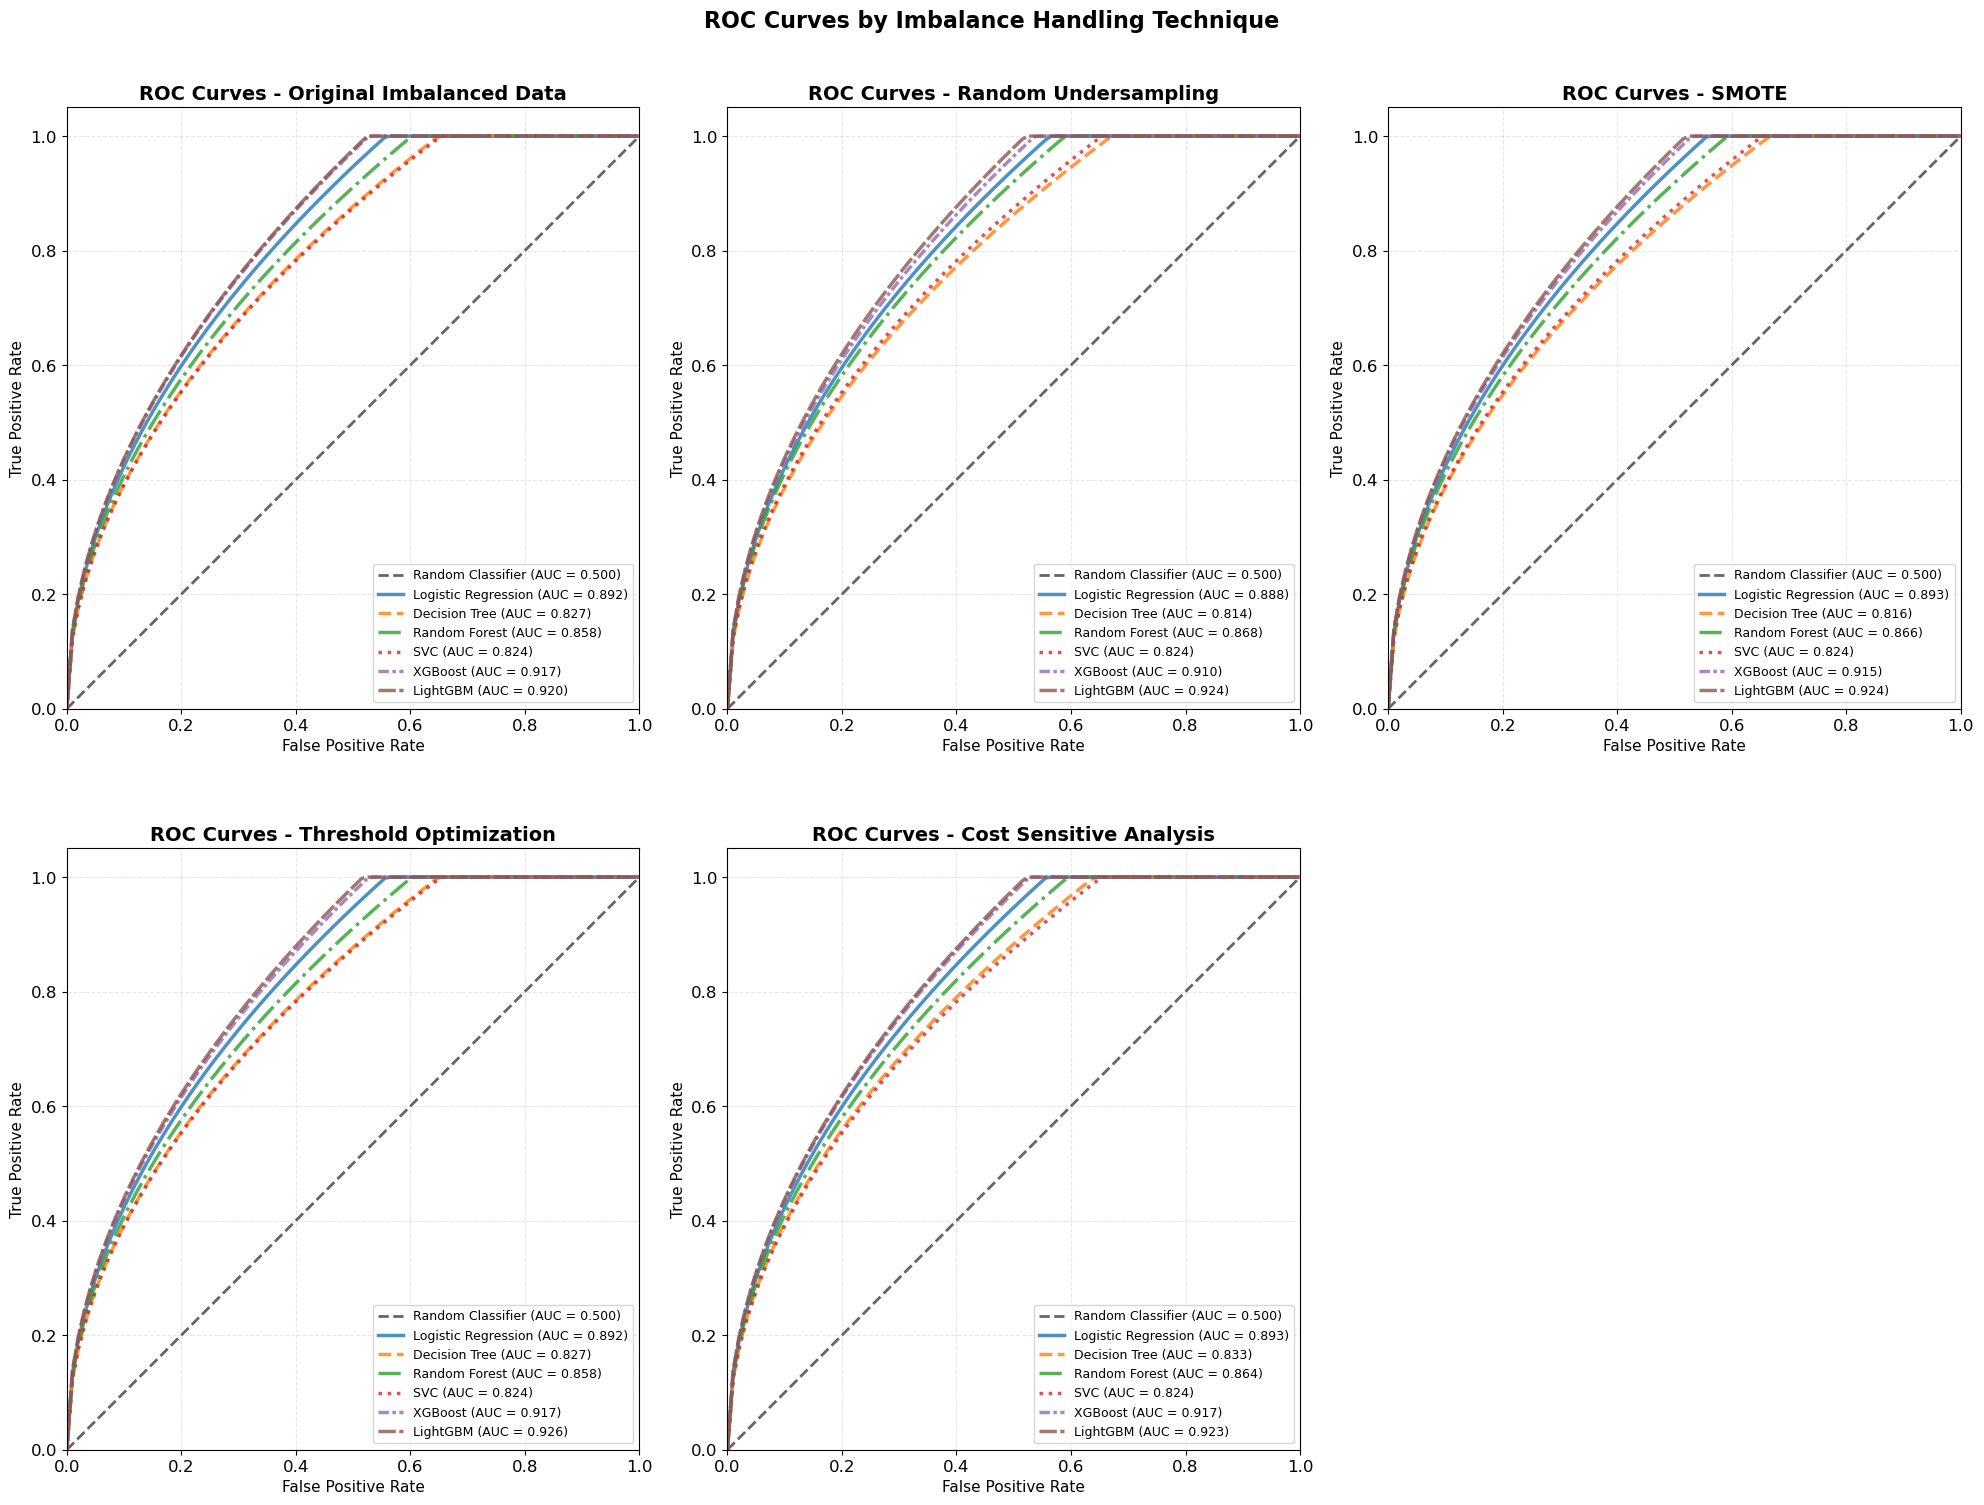

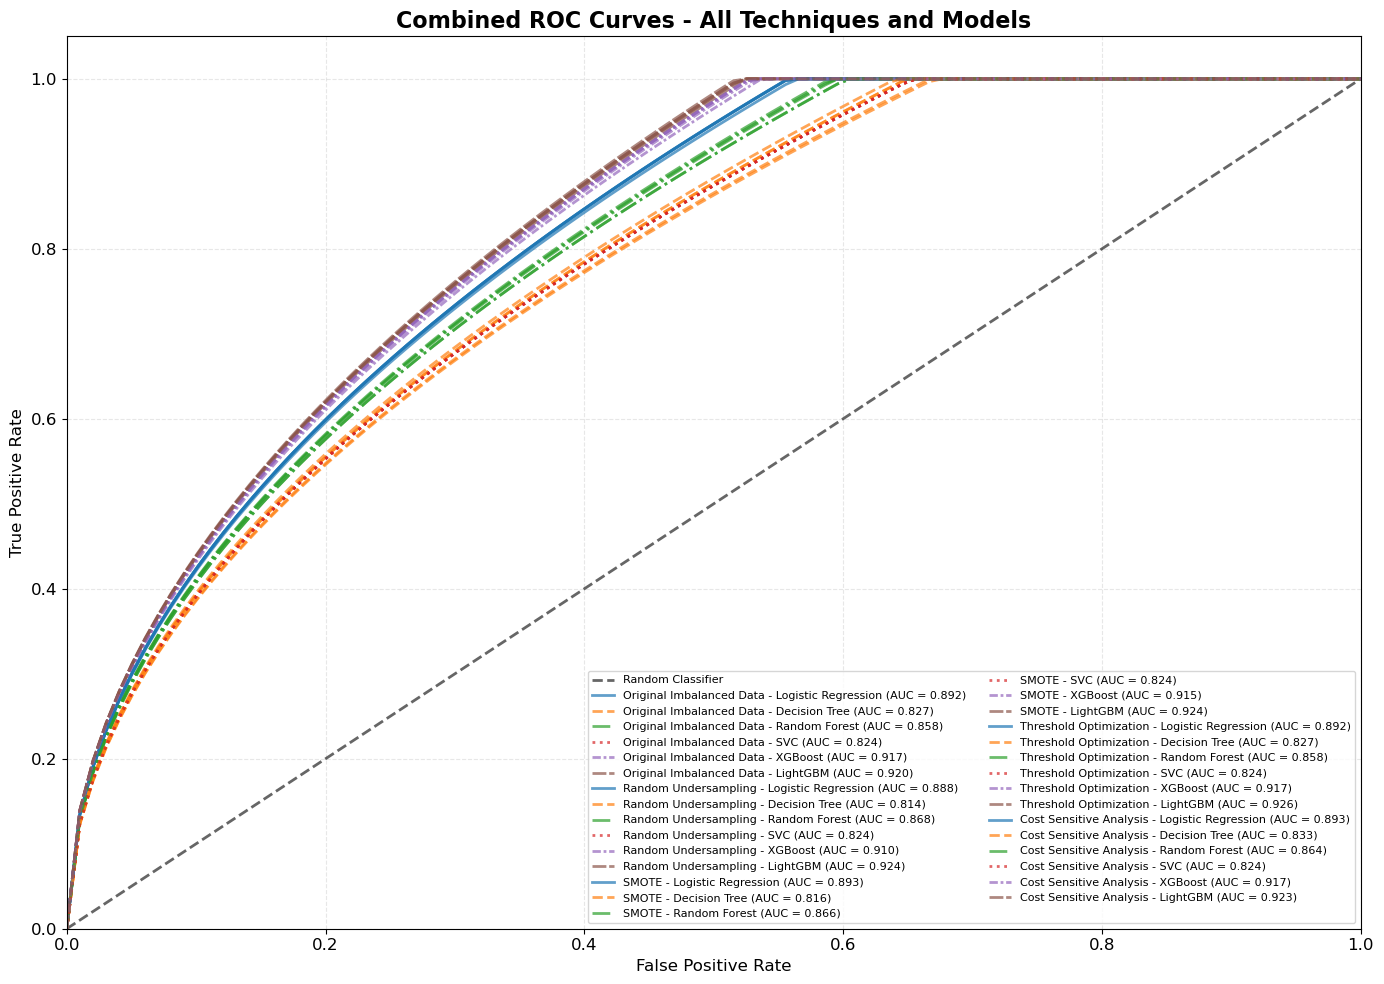

<Figure size 1600x800 with 0 Axes>

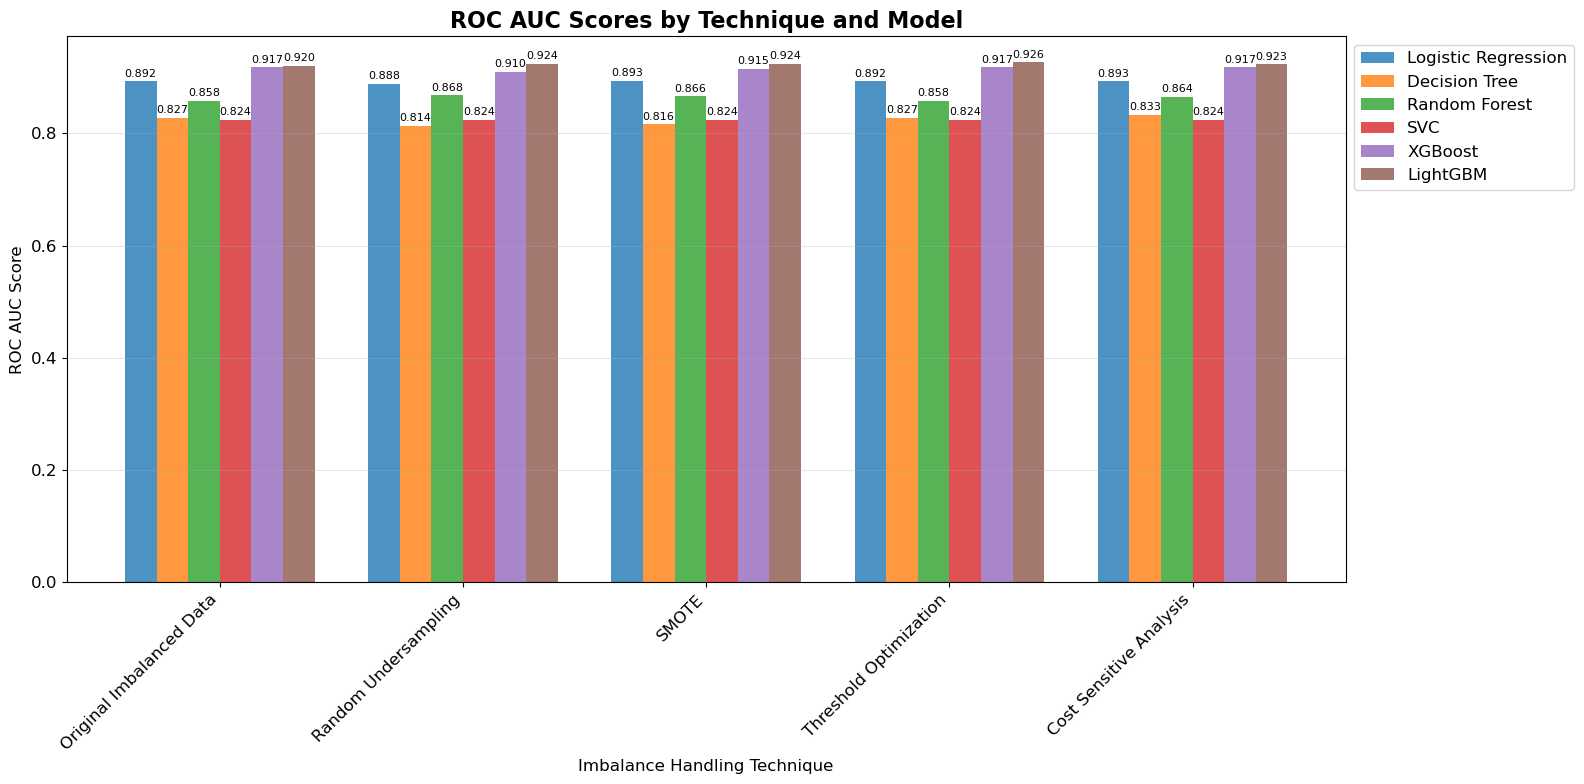

In [127]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
import seaborn as sns

# Set up the plot style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['font.size'] = 12

# Define colors for different models
model_colors = {
    'Logistic Regression': '#1f77b4',      # blue
    'Decision Tree': '#ff7f0e',           # orange
    'Random Forest': '#2ca02c',           # green
    'SVC': '#d62728',                     # red
    'XGBoost': '#9467bd',                 # purple
    'LightGBM': '#8c564b'                 # brown
}

# Define line styles for better distinction
model_line_styles = {
    'Logistic Regression': '-',
    'Decision Tree': '--',
    'Random Forest': '-.',
    'SVC': ':',
    'XGBoost': (0, (3, 1, 1, 1)),
    'LightGBM': (0, (5, 1))
}

# Define marker styles (optional, for extra distinction)
model_markers = {
    'Logistic Regression': 'o',
    'Decision Tree': 's',
    'Random Forest': '^',
    'SVC': 'D',
    'XGBoost': 'v',
    'LightGBM': '<'
}

# Get unique techniques
techniques = combined_df['Imbalance Technique'].unique()

# Create a figure with 5 subplots (one for each technique)
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
axes = axes.flatten()

# Remove the extra subplot if we have 5 techniques
if len(techniques) == 5:
    fig.delaxes(axes[5])

# Plot ROC curves for each technique
for i, technique in enumerate(techniques):
    if i >= len(axes):  # Safety check
        break
        
    ax = axes[i]
    technique_data = combined_df[combined_df['Imbalance Technique'] == technique]
    
    # Plot diagonal reference line
    ax.plot([0, 1], [0, 1], 'k--', lw=2, alpha=0.6, label='Random Classifier (AUC = 0.500)')
    
    # Plot each model's ROC curve for this technique
    for _, row in technique_data.iterrows():
        model_name = row['Model']
        roc_auc = row['ROC AUC']
        
        # REPLACE THIS WITH YOUR ACTUAL PROBABILITIES
        # Example: y_probs = y_probs_o_LR for Original Logistic Regression
        # y_test = your actual test labels
        
        # This is placeholder - replace with your actual probability arrays
        if f'y_probs_{technique.split()[0].lower()}_{model_name.split()[0].lower()}' in globals():
            y_probs = globals()[f'y_probs_{technique.split()[0].lower()}_{model_name.split()[0].lower()}']
            fpr, tpr, _ = roc_curve(y_test, y_probs)
            roc_auc_calculated = auc(fpr, tpr)
        else:
            # Create dummy ROC curve (replace with your actual data)
            fpr = np.linspace(0, 1, 100)
            base_tpr = np.sqrt(fpr)  # Reasonable ROC shape approximation
            # Scale to match the reported AUC
            scaling_factor = roc_auc / auc(fpr, base_tpr)
            tpr = base_tpr * scaling_factor
            tpr = np.clip(tpr, 0, 1)  # Ensure valid values
            roc_auc_calculated = auc(fpr, tpr)
        
        # Plot the ROC curve
        ax.plot(fpr, tpr, 
                color=model_colors[model_name],
                linestyle=model_line_styles[model_name],
                #marker=model_markers[model_name],
                #markersize=4,
                lw=2.5,
                alpha=0.8,
                label=f'{model_name} (AUC = {roc_auc:.3f})')
    
    # Customize the subplot
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize=11)
    ax.set_ylabel('True Positive Rate', fontsize=11)
    ax.set_title(f'ROC Curves - {technique}', fontsize=14, fontweight='bold')
    ax.legend(loc="lower right", fontsize=9)
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.suptitle('ROC Curves by Imbalance Handling Technique', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Create a combined comparison plot
plt.figure(figsize=(14, 10))

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', lw=2, alpha=0.6, label='Random Classifier')

# Plot all techniques and models
for technique in techniques:
    technique_data = combined_df[combined_df['Imbalance Technique'] == technique]
    
    for _, row in technique_data.iterrows():
        model_name = row['Model']
        roc_auc = row['ROC AUC']
        
        # REPLACE WITH YOUR ACTUAL PROBABILITIES
        if f'y_probs_{technique.split()[0].lower()}_{model_name.split()[0].lower()}' in globals():
            y_probs = globals()[f'y_probs_{technique.split()[0].lower()}_{model_name.split()[0].lower()}']
            fpr, tpr, _ = roc_curve(y_test, y_probs)
        else:
            # Dummy curve (replace with actual data)
            fpr = np.linspace(0, 1, 100)
            base_tpr = np.sqrt(fpr)
            scaling_factor = roc_auc / auc(fpr, base_tpr)
            tpr = base_tpr * scaling_factor
            tpr = np.clip(tpr, 0, 1)
        
        plt.plot(fpr, tpr, 
                color=model_colors[model_name],
                linestyle=model_line_styles[model_name],
                lw=2,
                alpha=0.7,
                label=f'{technique} - {model_name} (AUC = {roc_auc:.3f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Combined ROC Curves - All Techniques and Models', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=8, ncol=2)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Create AUC comparison bar chart
plt.figure(figsize=(16, 8))

# Prepare data for bar chart
technique_model_auc = []
for technique in techniques:
    technique_data = combined_df[combined_df['Imbalance Technique'] == technique]
    for _, row in technique_data.iterrows():
        technique_model_auc.append({
            'Technique': technique,
            'Model': row['Model'],
            'AUC': row['ROC AUC']
        })

auc_df = pd.DataFrame(technique_model_auc)

# Create grouped bar chart
x = np.arange(len(techniques))
width = 0.13  # Width of each bar

fig, ax = plt.subplots(figsize=(16, 8))
models = auc_df['Model'].unique()

for i, model in enumerate(models):
    model_aucs = auc_df[auc_df['Model'] == model]['AUC'].values
    ax.bar(x + i * width, model_aucs, width, label=model, color=model_colors[model], alpha=0.8)

ax.set_xlabel('Imbalance Handling Technique', fontsize=12)
ax.set_ylabel('ROC AUC Score', fontsize=12)
ax.set_title('ROC AUC Scores by Technique and Model', fontsize=16, fontweight='bold')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(techniques, rotation=45, ha='right')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, technique in enumerate(techniques):
    technique_data = auc_df[auc_df['Technique'] == technique]
    for j, (_, row) in enumerate(technique_data.iterrows()):
        ax.text(i + j * width, row['AUC'] + 0.005, f'{row["AUC"]:.3f}', 
                ha='center', va='bottom', fontsize=8, rotation=0)

plt.tight_layout()
plt.show()

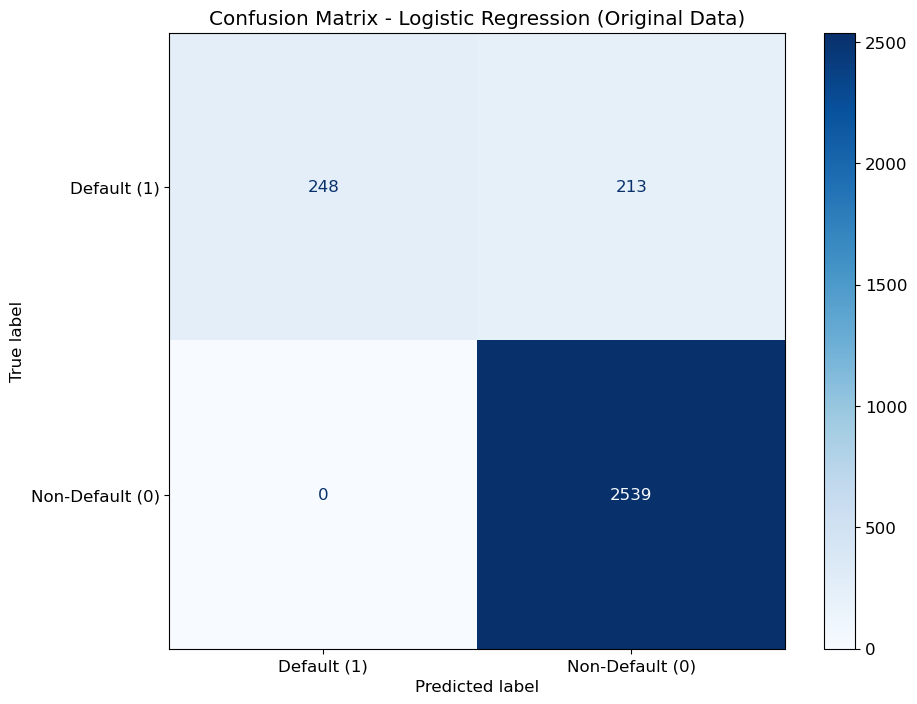

TP%: 84.63, TN%: 8.27, FP%: 7.10, FN%: 0.00


In [128]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Example: use Logistic Regression predictions
y_true = y_test  
y_pred = y_lr_o  # replace with predictions of your chosen model

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[1,0])  
# Note: order [1,0] ensures row=actual default/non-default

# Display confusion matrix (counts)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Default (1)", "Non-Default (0)"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression (Original Data)")
plt.show()

# ---- Calculate percentages ----
TN, FP, FN, TP = cm.ravel()  

total = cm.sum()
TP_percent = (TP / total) * 100
TN_percent = (TN / total) * 100
FP_percent = (FP / total) * 100
FN_percent = (FN / total) * 100

print(f"TP%: {TP_percent:.2f}, TN%: {TN_percent:.2f}, FP%: {FP_percent:.2f}, FN%: {FN_percent:.2f}")


# SHAP

In [129]:
import shap

LGBM with cost Sensitive Analysis 

In [130]:
# Get the selected feature names from your RFECV
LGBMselected_feature_names = X_train_preprocessed_df.columns[LGBMrfecv.support_].tolist()

# Convert your selected training data to DataFrame
LGBM_X_train_selected_df = pd.DataFrame(LGBM_X_train_selected, columns=LGBMselected_feature_names)

# Also convert your test data for consistency
LGBM_X_test_selected_df = pd.DataFrame(LGBM_X_test_selected, columns=LGBMselected_feature_names)

# Common practice: use a sample of the training data as the background
explainer = shap.TreeExplainer(rf_weighted_LGBM)

In [131]:
shap_values = explainer.shap_values(LGBM_X_test_selected)

# Global feature importance
shap_importance = np.abs(shap_values).mean(0)

/Users/manishathakur/opt/anaconda3/lib/python3.9/site-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


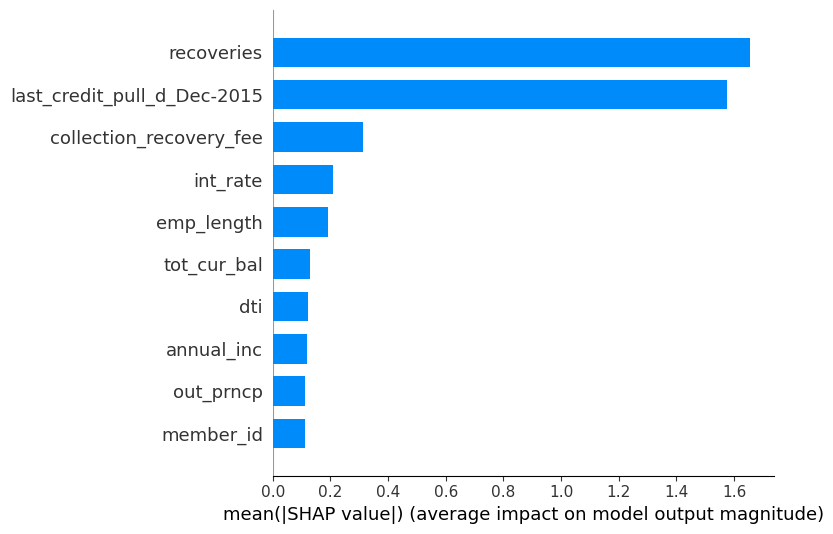

In [132]:
shap.summary_plot(shap_values, LGBM_X_test_selected_df, max_display=10, plot_type='bar', title='LightGBM Feature Importance with Cost Sensitive Analysis',
                 alpha=1,feature_names=LGBMselected_feature_names, show=False)

LightGBM with SMOTE

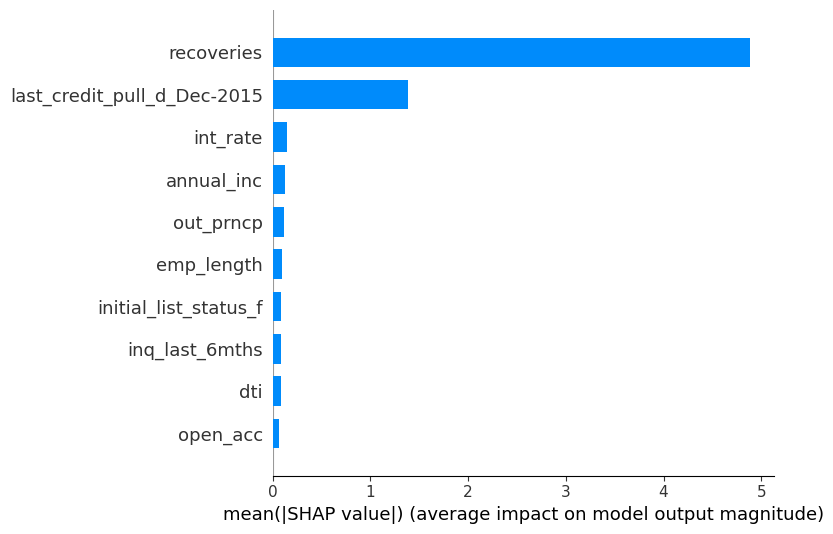

In [133]:
# Common practice: use a sample of the training data as the background
explainer = shap.TreeExplainer(rf_smote_LGBM)
shap_values = explainer.shap_values(LGBM_X_test_selected)

# Global feature importance
shap_importance = np.abs(shap_values).mean(0)

shap.summary_plot(shap_values, LGBM_X_test_selected_df, max_display=10, plot_type='bar', title='LightGBM Feature Importance with SMOTE',
                 alpha=1,feature_names=LGBMselected_feature_names, show=False)

LGBM with Threshold Optimization

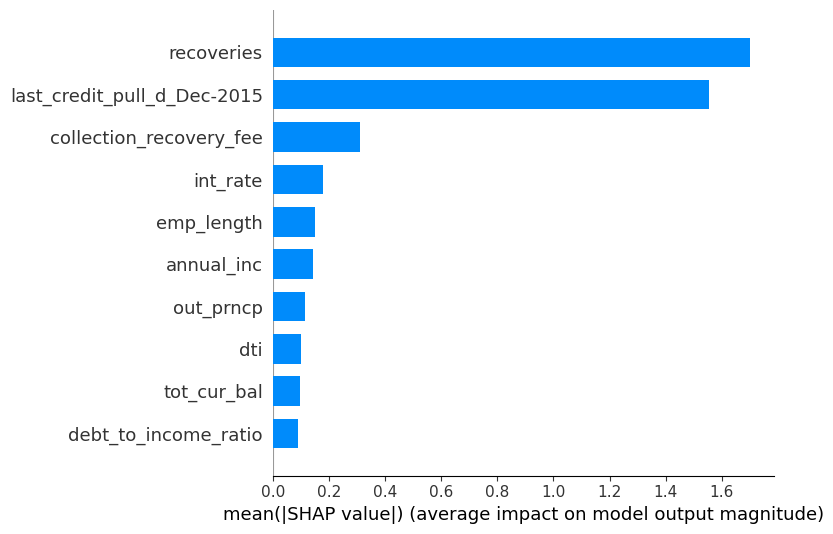

In [134]:
# Common practice: use a sample of the training data as the background
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(LGBM_X_test_selected)

# Global feature importance
shap_importance = np.abs(shap_values).mean(0)

shap.summary_plot(shap_values, LGBM_X_test_selected_df, max_display=10, plot_type='bar', title='LightGBM Feature Importance with Threshold Optimization',
                 alpha=1,feature_names=LGBMselected_feature_names, show=False)

LGBM on Origina Imbalanced dataset

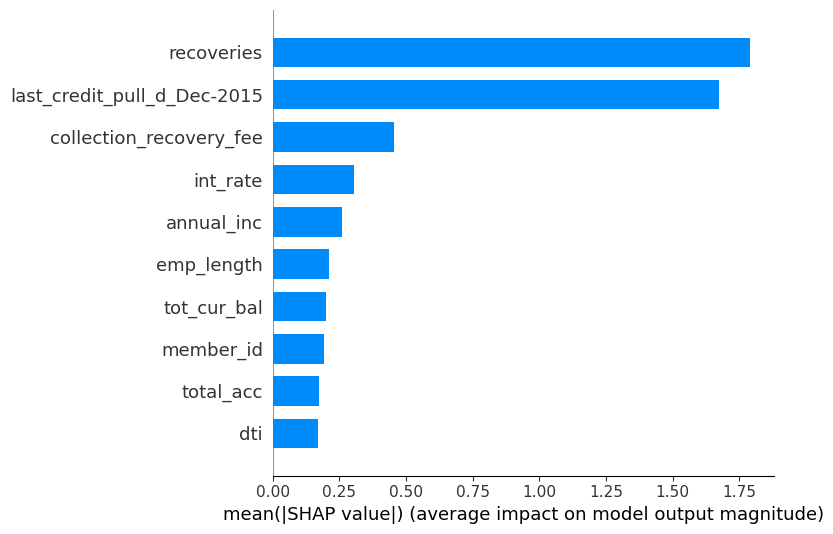

In [135]:
# Common practice: use a sample of the training data as the background
explainer = shap.TreeExplainer(lgbm_o)
shap_values = explainer.shap_values(LGBM_X_test_selected)

# Global feature importance
shap_importance = np.abs(shap_values).mean(0)

shap.summary_plot(shap_values, LGBM_X_test_selected_df, max_display=10, plot_type='bar', title='LightGBM Feature Importance on original imbalanced data',
                 alpha=1,feature_names=LGBMselected_feature_names, show=False)

XGBoost with Threshold

In [136]:
# Get the selected feature names from your RFECV
XGBselected_feature_names = X_train_preprocessed_df.columns[XGBrfecv.support_].tolist()

# Convert your selected training data to DataFrame
XGB_X_train_selected_df = pd.DataFrame(XGB_X_train_selected, columns=XGBselected_feature_names)

# Also convert your test data for consistency
XGB_X_test_selected_df = pd.DataFrame(XGB_X_test_selected, columns=XGBselected_feature_names)

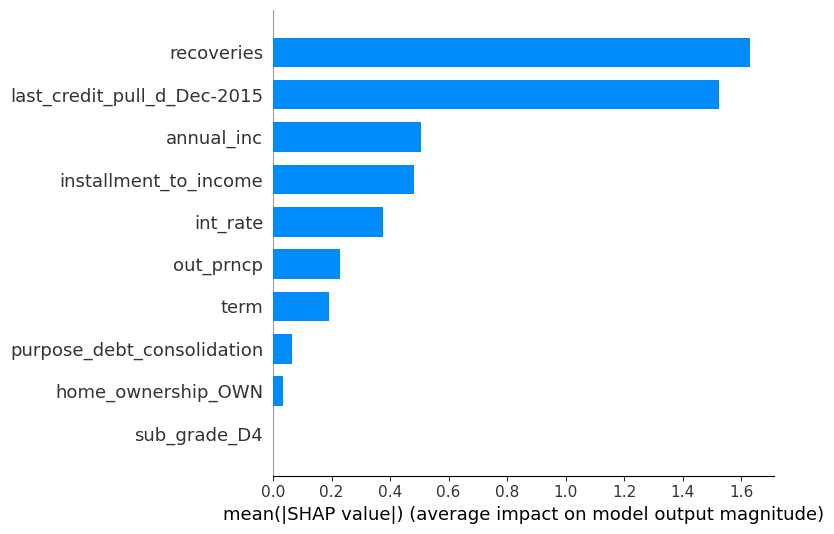

In [137]:
# Common practice: use a sample of the training data as the background
explainer = shap.TreeExplainer(xgb_th)
shap_values = explainer.shap_values(XGB_X_test_selected)

# Global feature importance
shap_importance = np.abs(shap_values).mean(0)

shap.summary_plot(shap_values, XGB_X_test_selected_df, max_display=10, plot_type='bar', title='XGBoost Feature Importance with Threshold Optimization',
                 alpha=1,feature_names=XGBselected_feature_names, show=False)

Cost sensitive XGBoost

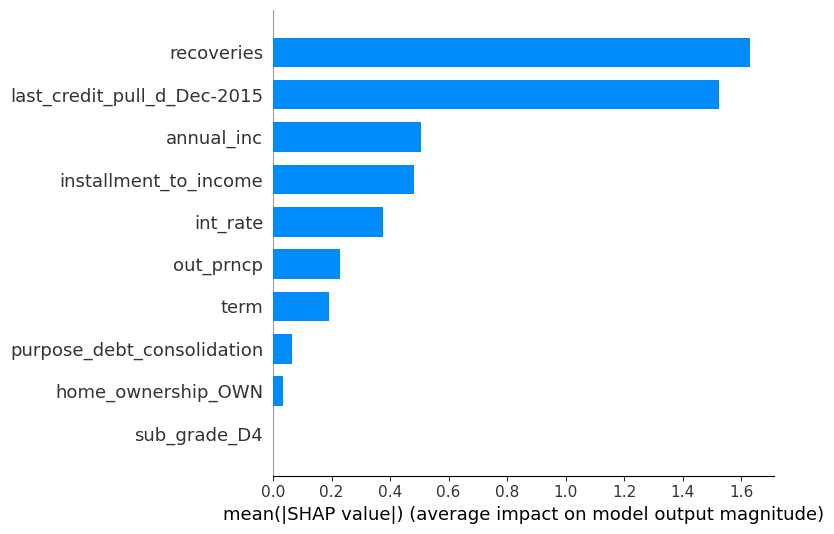

In [138]:
# Common practice: use a sample of the training data as the background
explainer = shap.TreeExplainer(rf_weighted_XGB)
shap_values = explainer.shap_values(XGB_X_test_selected)

# Global feature importance
shap_importance = np.abs(shap_values).mean(0)

shap.summary_plot(shap_values, XGB_X_test_selected_df, max_display=10, plot_type='bar', title='XGBoost Feature Importance with Cost Sensitivity',
                 alpha=1,feature_names=XGBselected_feature_names, show=False)

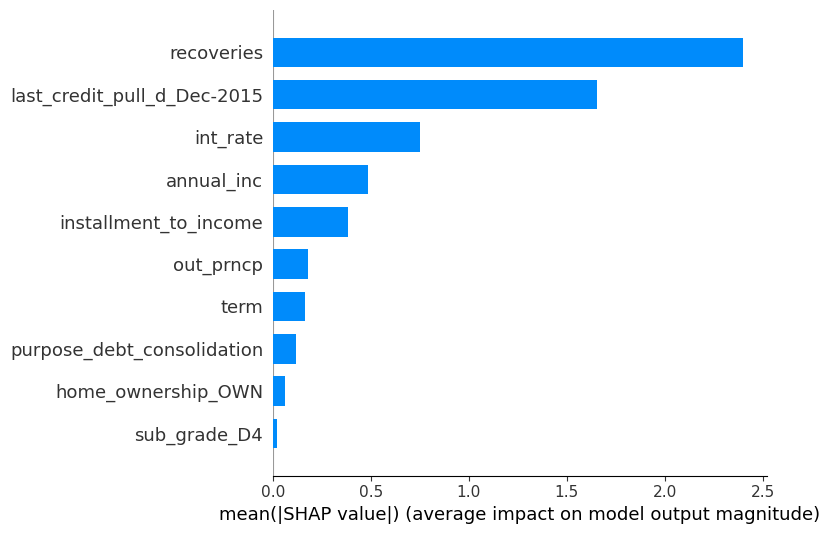

In [139]:
# Common practice: use a sample of the training data as the background
explainer = shap.TreeExplainer(rf_smote_XGB)
shap_values = explainer.shap_values(XGB_X_test_selected)

# Global feature importance
shap_importance = np.abs(shap_values).mean(0)

shap.summary_plot(shap_values, XGB_X_test_selected_df, max_display=10, plot_type='bar', title='XGBoost Feature Importance with SMOTE',
                 alpha=1,feature_names=XGBselected_feature_names, show=False)

Cost Sensitive RF

In [140]:
# Get the selected feature names from your RFECV
RFselected_feature_names = X_train_preprocessed_df.columns[RFrfecv.support_].tolist()

# Convert your selected training data to DataFrame
RF_X_train_selected_df = pd.DataFrame(RF_X_train_selected, columns=RFselected_feature_names)

# Also convert your test data for consistency
RF_X_test_selected_df = pd.DataFrame(RF_X_test_selected, columns=RFselected_feature_names)

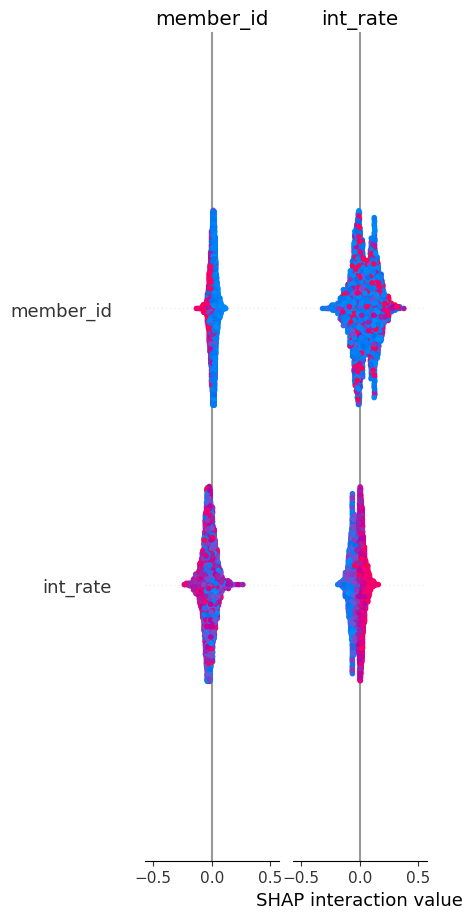

In [141]:
# Common practice: use a sample of the training data as the background
explainer = shap.Explainer(rf_smote_RF)
shap_values = explainer.shap_values(RF_X_test_selected)

# Global feature importance
shap_importance = np.abs(shap_values).mean(0)

shap.summary_plot(shap_values, RF_X_test_selected_df, max_display=10, plot_type='bar', title='RF Feature Importance with Cost Sensitivity',
                 alpha=1,feature_names=RFselected_feature_names, show=False)